<a href="https://colab.research.google.com/github/songiangvn/AI-Machine-Learning-for-Coders/blob/main/Chapter06_Making_Sentiment_Programmable_Using_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6: Making Sentiment Programmable Using Embeddings  
### (Lập trình hóa ngữ nghĩa bằng cách sử dụng các vector biểu diễn)  

P/s: Dịch thô là "Làm cho cảm xúc có thể lập trình được bằng cách sử dụng phần nhúng". Thường, mọi người sẽ gọi là **Embedding** luôn, vì nó giống như một thuật ngữ đặc trưng. Mình nghĩ nếu dịch ra thì gần nghĩa nhất là **vector biểu diễn**.  

Nếu mọi người có cách dịch nào hay hơn, có thể góp ý cho mình nha. 💡  


![Word Embedding Image](https://f.hypotheses.org/wp-content/blogs.dir/4190/files/2018/04/Screen-Shot-2018-04-25-at-13.21.44.png)

## Tổng quan nội dung chương này:  

Chúng ta sẽ tìm hiểu về cách thức mà **embedding** hay các **vector biểu diễn** hoạt động. 🧠  
Tụi mình sẽ sử dụng bộ dữ liệu **Sarcasm** đã tiếp xúc ở **chương 5** để xây dựng **embeddings** giúp mô hình có thể phát hiện được sự mỉa mai trong các câu văn. 💬  

Ngoài ra, tụi mình cũng sẽ tìm hiểu về một vài công cụ trực quan hóa dữ liệu để hiểu rõ hơn:  
- Các từ trong văn bản tương ứng với các vector.  
- Cách mà chúng xác định được phân loại tổng thể. 📊  


Trước khi bắt đầu **chương 6**, tụi mình cùng ôn tập lại một chút về **chương 5** nha. 📝  

Ở chương trước, chúng ta đã tìm hiểu thế nào là **mã hóa văn bản**, các cách cơ bản để mã hóa như **mã hóa ký tự** hay **mã hóa từ**, chuyển đổi chúng thành một chuỗi hay dãy các số để máy có thể học tập và phân tích được. 🔢  

Tuy nhiên, chúng ta phải thừa nhận một điều rằng:  
> **Tất cả dữ liệu đều quy về dạng số, và điều mà các mô hình học máy thực hiện là tính toán xác suất.**  
> **Chúng không có khả năng hiểu được ngữ nghĩa của văn bản.**  

Cách duy nhất để các số chứa đựng được **ngữ nghĩa của từ** là thông qua mã hóa.  
**Tin buồn** là:  
> *Không có phương pháp mã hóa nào có thể bao hàm **tuyệt đối** ngữ nghĩa của một từ hay văn bản.* 😞  

**Tin vui** là:  
> *Không có phương pháp tuyệt đối, nhưng chúng ta có những phương pháp **tương đối** để nắm bắt ngữ nghĩa tốt hơn. Các phương pháp này liên tục được phát triển và cải thiện.* 🎉  

Hiện nay, hướng phát triển tốt nhất là:  
> **Tăng cường dữ liệu đại diện cho các từ thông qua mã hóa các từ thành vector biểu diễn (embeddings).**  

Các vector này được biểu diễn trên một **chiều không gian cao hơn**. Nếu thấy khó hiểu, đừng lo, chúng ta sẽ đi vào ví dụ cụ thể nha. 👇  

Ở **chương 5**, chúng ta học về **mã hóa ký tự** và **mã hóa từ**, giúp biến các câu văn, văn bản thành **vector một chiều** - hay còn gọi là **không gian một chiều**.  



```python
"Cảm ơn vũ trụ đã cho con sống lại một lần nữa để có thể làm những điều tuyệt vời này <3. ""
              |
              v
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
```
***Thần chú: tập hợp các phần tử tạo nên câu văn trong không gian một chiều có tọa độ là (x).***

Các phần tử có tọa độ lần lượt là:


```python
'Cảm': 1,
'ơn': 2,
'vũ': 3,
...
```


---

Giờ đây với phương pháp **word embedding**, các câu văn có thể được **mã hóa** lên một **chiều cao hơn** như một loạt các vector:

```python
"Cảm ơn vũ trụ đã cho con sống lại một lần nữa để có thể làm những điều tuyệt vời này <3."
              |
              v
[
 [0.1, 0.3, 0.5, 0.2, 0.9],  # Vector đại diện cho "Cảm"
 [0.4, 0.6, 0.7, 0.3, 0.8],  # Vector đại diện cho "ơn"
 [0.2, 0.8, 0.6, 0.4, 0.7],  # Vector đại diện cho "vũ"
 [0.5, 0.1, 0.3, 0.9, 0.6],  # Vector đại diện cho "trụ"
 ...
]

```

Vì khi chuyển thành ma trận, việc nhìn chiều ngang thành chiều dọc dễ gây nhầm lẫn, nên mọi người cần để ý kỹ phần này nha. ⚠️  

Hiện tại, câu văn của chúng ta đã được chuyển sang một **không gian 5 chiều**.  

Câu văn vẫn là một chuỗi các phần tử liên tiếp nhau. Nhưng giờ đây, mỗi phần tử (từ) sẽ là một điểm dữ liệu ở **không gian 5 chiều**.  

***Thần chú: Tập hợp các phần tử tạo nên câu văn trong không gian 5 chiều có tọa độ là (x, y, z, p, q).***  

Các phần tử có tọa độ lần lượt là:  



```python
'Cảm': [0.1, 0.3, 0.5, 0.2, 0.9],
'ơn': [0.4, 0.6, 0.7, 0.3, 0.8],
'vũ': [0.2, 0.8, 0.6, 0.4, 0.7],
...
```

Mọi người có thể liên tưởng nó giống như toán cấp 3, phần **hình học không gian 3 chiều** ha. Ví dụ như khối lập phương với 4 đỉnh có tọa độ (x, y, z)... 📐  

Ở đây, mình có thêm một ví dụ nữa khi thực hiện **embeddings văn bản**, chuyển các từ vào không gian 3 chiều nha. 🔢  


![Embedding in 3D](https://www.baeldung.com/wp-content/uploads/sites/4/2023/03/word_embedding.drawio.png)

Các vector này sẽ không ngừng được học theo thời gian, dựa trên việc sử dụng các từ trong ngữ cảnh. Qua đó, ta có thể nắm bắt được nhiều ngữ nghĩa hơn của từ, câu, hay văn bản. 📈  

Ngoài phương pháp **word embedding** trên, vẫn còn nhiều phương pháp **embedding** khác với cách thức kết hợp cả các phép toán như cộng, trừ, nhân, chia. Mọi người có thể thử tìm hiểu thêm về các phương pháp khác như **Sentence embedding** nha. 💡  

***Lưu ý:*** Mình phải nhấn mạnh một lần nữa, mọi thứ vẫn chỉ ở mức **tương đối** và không có gì là **tuyệt đối** cả (tính ở thời điểm hiện tại). ⚠️  



# Establishing Meaning from Words (Thiết lập, tổ chức ngữ nghĩa từ các từ) 📚  


## A Simple Example: Positives and Negatives 🌟➕➖  


Thì trước khi đi vào cụ thể các **vector biểu diễn ở chiều không gian cao hơn**, tụi mình cùng đến với một vài ví dụ đơn giản để hiểu cách mà **ngữ nghĩa bắt nguồn từ các từ** nha. 💡  

Tụi mình sẽ lấy dữ liệu từ bộ dữ liệu **Sarcasm** và giả định phương pháp **mã hóa** đơn giản như sau:  
- Tất cả các từ đều có điểm số khởi tạo là 0.  
- Với các từ xuất hiện trong các **tiêu đề mỉa mai**, ta sẽ **cộng** 1 giá trị vào. ➕  
- Với các trường hợp còn lại, ta sẽ **trừ** đi một giá trị. ➖  
- Qua đó, các từ cân bằng, không đóng góp nhiều vào ngữ nghĩa phân biệt các câu, sẽ có giá trị là 0 **(giá trị tích cực và tiêu cực bằng nhau)**. ⚖️  

Tiến hành phân tích cụ thể với 2 câu:  


```python
"christian bale given neutered male statuette named oscar" - Câu mỉa mai

"gareth bale scores wonder goal against germany" - Không phải câu mỉa mai.
```

Tiến hành trích xuất ngữ nghĩa câu đầu tiên:
```python
{"christian": 1, "bale": 1, "given": 1, "neutered": 1, "male": 1, "statuette": 1, "named": 1, "oscar": 1}
```

Tiếp tục trích xuất ngữ nghĩa các từ với câu thứ hai:
```python
{"gareth": -1, "bale": -1, "scores": -1, "wonder": -1, "goal": -1, "against": -1, "germany": -1}
```

Tổng hợp lại danh sách ngữ nghĩa các từ:
```python
{ "christian" : 1, "bale" : 0, "given" : 1, "neutered": 1, "male" : 1,
 "statuette": 1, "named" : 1, "oscar": 1, "gareth" : -1, "scores": -1,
 "wonder" : -1, "goal" : -1, "against" : -1, "germany" : -1}
```

Ở đây mọi người thấy đấy:
```python
"bale": 0
```
Từ **"bale"**, vì xuất hiện trong cả 2 trường hợp, nên đã bù trừ, triệt tiêu nhau còn 0. ⚖️  
Cứ lặp lại quá trình này qua các câu, tiêu đề trong bộ dataset, ta sẽ thu được một danh sách khổng lồ từ vựng được đánh giá điểm số dựa trên cách sử dụng của chúng. 📊  

Bây giờ, ta tiến hành dự đoán hoặc xác định xem câu dưới đây có phải mang ý **mỉa mai** không, dựa trên từ điển hay **danh sách ngữ nghĩa** ở trên nha. 🤔  


```python
"neutered male named against germany, wins statuette!": [1, 1, 1, -1, -1, 0, 1]
```
Ở đây, vì từ **"wins"** không có trong từ điển ngữ nghĩa, nên tụi mình để là **0** nha.

Sau khi mã hóa ra được dãy số đại diện cho **list điểm số tích cực/tiêu cực** của các từ, ta sẽ cộng hết lại.  
**Tổng điểm số** của câu đạt được là **2** (một **số dương**). Qua đó, ta xác định đây là một **câu mỉa mai**. 🤔💡  


## Going a Little Deeper: Vectors  
Tụi mình cùng đi sâu hơn với khái niệm **vector** nha. 🧮  


Hy vọng thông qua ví dụ trước đó, mọi người có thể hiểu thêm về cách thiết lập, tổ chức ***ngữ nghĩa tương đối*** cho các từ, dựa trên mối liên hệ và liên kết của chúng theo cùng **một hướng**. 🔄  

Nói hơi khó hiểu, nên tụi mình phân tích lại nha:  
- Ta có một đường thẳng hay **vector** đại diện cho không gian một chiều.  
- Trên đó, mỗi từ sau quá trình học sẽ có **điểm số riêng**, điểm số này đại diện cho tọa độ trên vector. 📍  

### Quá trình học:  
1. Các từ ban đầu đều có tọa độ hay điểm số là **0**.  
2. Khi kiểm tra thấy từ đó xuất hiện trong câu được đánh nhãn là **mỉa mai**, tọa độ sẽ **+1**, **di chuyển về chiều dương**. ➕  
3. Các từ xuất hiện trong câu **không có ý mỉa mai** sẽ **-1 vào tọa độ**. ➖  
4. Cứ lặp lại như vậy đến khi hết bộ dữ liệu, ta thu được một **tập ngữ nghĩa tương đối** của các từ. 📊  


Ok, bây giờ tụi mình sẽ thử đến với một ví dụ nâng cao hơn nha, khi mà chúng ta **tăng số chiều** lên để nắm bắt được nhiều thông tin hơn. 📈  

Ở đây, tác giả lấy ví dụ về việc xem xét, phân tích các nhân vật trong cuốn tiểu thuyết **"Kiêu hãnh và định kiến"** của nhà văn **Jane Austen**. 📚  

### Phân tích:  
- **Chiều x**: Đại diện cho **giới tính**.  
- **Chiều y**: Đại diện cho **sự quý tộc**.  
- **Độ dài của vector**: Đại diện cho **mức độ giàu có của mỗi nhân vật**. 💰  


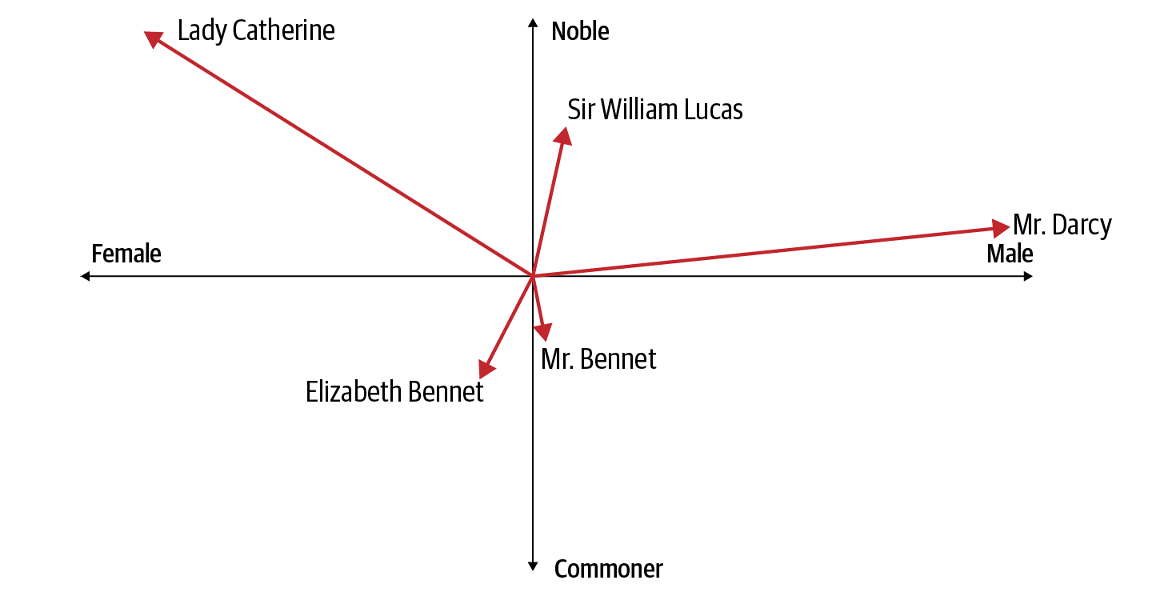

Khi quan sát biểu đồ trên, mọi người có thể thấy:  
- **Ông Darcy**: Là một người cực kỳ giàu có nhưng không cao quý bằng **ông William Lucas**, mặc dù ông ta ít giàu có hơn. 💵  
  - Darcy được gọi là quý ông - "Mr", trong khi William Lucas lại được gọi là ngài - "Sir".  

- **Ông Bennet**: Rõ ràng ông không phải là quý tộc và đang gặp khó khăn về tài chính, thể hiện qua **mũi tên hướng xuống**. ↘️  
  - Con gái ông, **Elizabeth Bennet**, cũng trong hoàn cảnh tương tự.  

- **Quý cô Lady Catherine**: Là người vượt trội nhất, vừa **rất giàu có** vừa có **địa vị quý tộc vô cùng cao**. 👑  
  
Cuộc tình lãng mạn giữa **Elizabeth** và **Darcy** đã làm nổi bật những **định kiến căng thẳng** giữa:  
- **Sự phân biệt giàu nghèo**.  
- **Tầng lớp giữa các quý tộc**. 🏰  


Quay trở lại bài học của chúng ta, mỗi nhân vật trong ví dụ trên cũng tương tự giống như một **từ** vậy.  

Thông qua việc **quan sát ở nhiều chiều**, ta có thể khai thác được nhiều **khía cạnh và ý nghĩa tương đối**, dựa trên:  
- Các **trục tọa độ**. 🧭  
- **Mối quan hệ giữa các vector** đại diện cho một từ với các từ khác. 🔗  


# Embeddings in TensorFlow  
Tụi mình sẽ tìm hiểu về **vector biểu diễn (embeddings)** với **TensorFlow** nha. 🤖  

Nếu như ở các chương trước, tụi mình đã tìm hiểu về các lớp có khả năng học như **Dense** và **Conv2D**, thì **TensorFlow.keras** cũng bổ sung cơ chế **embeddings** dưới dạng một lớp. 📚  

Lớp **Embedding** này sẽ tạo ra một **bảng tra cứu ánh xạ** từ số nguyên đến một bảng nhúng (embedding table).  
- Nội dung của bảng nhúng là các hệ số của vector biểu diễn, đại diện cho các từ được xác định bởi các số nguyên.  
- Trong ví dụ về cuốn tiểu thuyết **"Kiêu hãnh và định kiến"**, các tọa độ **x** và **y** cung cấp vector biểu diễn cụ thể cho các nhân vật trong sách.  

### Ứng dụng thực tế:  
Các vấn đề, bài toán liên quan đến **NLP** cũng tương tự như vậy. Tuy nhiên, ta sẽ sử dụng **số lượng chiều cao hơn** (không chỉ đơn thuần là 2). 📈  

**Hướng của mỗi vector** sẽ được coi là mã hóa **"ngữ nghĩa"** của từ. Các từ có vector tương tự nhau, hướng gần giống nhau, thì có thể nói rằng chúng có **mối liên hệ** hoặc **liên quan** với nhau. 🔗  

*Tui viết xong mà tui cũng bắt đầu thấy lú lú rồi. 🤯*  


> **Vậy trọng số hay các vector biểu diễn trong lớp embeddings sẽ được biểu diễn như thế nào đây?**  

Vâng, thật sự là chúng được **khởi tạo một cách ngẫu nhiên** đấy, không khác gì việc khởi tạo các ma trận bộ lọc của lớp tích chập. 🎲  
Sau đó, trong quá trình học, huấn luyện thì trọng số các vector này sẽ không ngừng được cập nhật thông qua cơ chế **lan truyền ngược (backpropagation)**. 🔄  

Sau khi kết thúc quá trình huấn luyện thì các vector biểu diễn các từ sẽ **mã hóa sơ bộ các đặc trưng tương đồng giữa các từ**, qua đó ta có thể xác định được các từ có phần tương đồng với nhau thông qua hướng các vector của chúng. 🔗  

Tụi mình sẽ sử dụng bộ dữ liệu **Sarcasm** đã tiếp xúc ở **chương 5** để thực hành nha. 📊  

## Building a Sarcasm Detector Using Embeddings  
### (Xây dựng mô hình phát hiện mỉa mai sử dụng các vector biểu diễn - cơ chế embedding) 🤖  


Dùng API của Kaggle để load thẳng dataset vào cache thay vì phải upload lên

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rmisra/news-headlines-dataset-for-sarcasm-detection")

print("Path to dataset files:", path)

100%|██████████| 3.30M/3.30M [00:00<00:00, 158MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection/versions/2


In [2]:
import os
print("Các thư mục dữ liệu hiện có:")
for f in os.listdir("/root/.cache/kagglehub/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection/versions/2"):
  print(f)

Các thư mục dữ liệu hiện có:
Sarcasm_Headlines_Dataset_v2.json
Sarcasm_Headlines_Dataset.json


In [3]:
# Ở đây tụi mình sẽ load bộ dữ liệu thứ 2
# Mình đề xuất xử dụng pandas để load và quan sát cho dễ nha.
import pandas as pd
# dùng pandas để load dữ liệu từ file json
sarcasm_headlines_dataset = pd.read_json("/root/.cache/kagglehub/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection/versions/2/Sarcasm_Headlines_Dataset.json", lines=True)

# Xem 5 dòng đầu tiên
sarcasm_headlines_dataset.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [5]:
# Lấy danh sách headlines và labels
headlines = sarcasm_headlines_dataset["headline"].tolist()
labels = sarcasm_headlines_dataset["is_sarcastic"].tolist()

# headlines chứa comments, labels chứa label cho comments đó

Tụi mình sẽ tiến hành xử lý nhanh phần loại bỏ từ dùng, làm sạch và đệm cho bộ dữ liệu nha. Các bạn có thể coi lại ở **chương 5** để ôn tập.

In [6]:
# Chuyển sang dùng tensorflow phiên bản 2.15
!pip install tensorflow==2.15 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.0 which is incompatible.
tensorstore 0.1.71 requires ml_dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.0 which is incompatible.


In [7]:
# Kiểm tra phiên bản tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


In [8]:
import tensorflow as tf
print("GPU available: ", tf.config.list_physical_devices('GPU'))

GPU available:  []


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords
import bs4 as BeautifulSoup
import re
import string
import numpy as np

In [10]:
# Lấy danh sách từ dừng
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
# Tạo table để xóa kí tự đặc biệt
table = str.maketrans('', '', string.punctuation)

In [12]:
# Tiến hành làm sạch văn bản
headlines_preprocessed = []
for h in headlines:
  sentence = h.lower()
  # Tiến hành xử lý các kí tự đặc biệt, phòng trường hợp người dùng viết liền chúng với các từ.
  sentence = sentence.replace(",", " , ")
  sentence = sentence.replace(".", " . ")
  sentence = sentence.replace("/", " / ")
  sentence = sentence.replace("?", " ? ")
  sentence = sentence.replace("!", " ! ")
  sentence = sentence.replace("-", " - ")
  sentence = sentence.replace("(", " ( ")
  sentence = sentence.replace(")", " ) ")
  sentence = sentence.replace("$", " $ ")
  sentence = sentence.replace("%", " % ")
  sentence = sentence.replace("&", " & ")

  # Loại bỏ các thẻ HTML bằng BeautifulSoup
  soup = BeautifulSoup.BeautifulSoup(sentence)
  sentence = soup.get_text()

  # Loại bỏ các kí tự đặc biệt
  sentence = sentence.translate(table)

  # Chuẩn hóa lại các kí tự khoảng trắng dư thừa liên tiếp thành 1 khoảng trắng
  sentence = re.sub('\s+', ' ', sentence)

  # Tiến hành lọc và loại bỏ từ dừng
  words = sentence.split()
  filtered_sentence = []

  for w in words:
    if w not in stop_words:
      filtered_sentence.append(w)

  filtered_sentence = " ".join(filtered_sentence)
  # Thêm vào danh sách headline đã tiền xử lý
  headlines_preprocessed.append(filtered_sentence)

In [13]:
# Tiến hành kiểm tra thử 5 câu đầu cho chắc
for i in range(5):
  print("Câu gốc: ", headlines[i])
  print("Câu đã được tiền xử lý: ", headlines_preprocessed[i])
  print("-"*100)

Câu gốc:  former versace store clerk sues over secret 'black code' for minority shoppers
Câu đã được tiền xử lý:  former versace store clerk sues secret black code minority shoppers
----------------------------------------------------------------------------------------------------
Câu gốc:  the 'roseanne' revival catches up to our thorny political mood, for better and worse
Câu đã được tiền xử lý:  roseanne revival catches thorny political mood better worse
----------------------------------------------------------------------------------------------------
Câu gốc:  mom starting to fear son's web series closest thing she will have to grandchild
Câu đã được tiền xử lý:  mom starting fear sons web series closest thing grandchild
----------------------------------------------------------------------------------------------------
Câu gốc:  boehner just wants wife to listen, not come up with alternative debt-reduction ideas
Câu đã được tiền xử lý:  boehner wants wife listen come alternativ

In [14]:
print("Số lượng mẫu: ",len(headlines_preprocessed))

Số lượng mẫu:  26709


In [15]:
from sklearn.model_selection import train_test_split

train_sequences, test_sequences, train_labels, test_labels = train_test_split(headlines_preprocessed, labels, test_size=0.2, random_state = 42)

In [16]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_sequences)
word_index = tokenizer.word_index
print("Xem tập từ điển: ", word_index)

Xem tập từ điển:  {'<OOV>': 1, 'new': 2, 'trump': 3, 'man': 4, 'one': 5, 'report': 6, 'donald': 7, 'area': 8, 'year': 9, 'u': 10, 'day': 11, 'woman': 12, 'says': 13, 'time': 14, 'first': 15, 'trumps': 16, 'like': 17, 'old': 18, 'get': 19, 'people': 20, 'life': 21, 'obama': 22, 'make': 23, 'house': 24, 'still': 25, 'white': 26, 'back': 27, 'women': 28, 'clinton': 29, '5': 30, 'world': 31, 'could': 32, 'years': 33, 'black': 34, 'americans': 35, 'family': 36, 'way': 37, 'study': 38, 'would': 39, 'school': 40, 'best': 41, 'gop': 42, 'show': 43, 'really': 44, 'american': 45, '3': 46, 'cant': 47, 'watch': 48, 'police': 49, 'last': 50, 'home': 51, 'going': 52, 'bill': 53, 'good': 54, 'death': 55, 'nation': 56, 'know': 57, 'president': 58, 'state': 59, 'health': 60, 'finds': 61, '10': 62, 'say': 63, 'video': 64, 'parents': 65, 'things': 66, 'right': 67, 'mom': 68, 'kids': 69, 'love': 70, '2': 71, 'every': 72, 'may': 73, 'hillary': 74, 'big': 75, 'party': 76, '000': 77, 'getting': 78, 'gets': 7

In [17]:
# Mã hóa cho tập train và tập test
train_sequences_encoded = tokenizer.texts_to_sequences(train_sequences)
test_sequences_encoded = tokenizer.texts_to_sequences(test_sequences)

In [18]:
# Kiểm tra đảm bảo việc mã hóa đã được thực hiện
print("Câu đã qua xử lý: ", train_sequences[0])
print("Câu đã được mã hóa: ", train_sequences_encoded[0])

Câu đã qua xử lý:  annoying ad turns man pro whaling
Câu đã được mã hóa:  [2311, 301, 644, 4, 792, 1]


Để chắc chắn có thể tương đồng với tác giả, mình đã tìm đến phần [source code](https://github.com/lmoroney/tfbook/blob/master/chapter6/sarcasm_classifier.ipynb) mẫu. 🔍  
Ở đây mình thấy tác giả để là **100**.  

Mặc dù không rõ áp dụng cho trường hợp nào, nhưng tạm thời mình sẽ dùng **100** làm độ dài tối đa cho **padding** nha. 📏  
Mọi người có thể linh hoạt thay đổi để xem sự khác biệt ra sao. 🧪  

In [19]:
padding_type = "post"
trunc_type = "post"
max_length = 100

# Tiến hành đệm cho bộ dữ liệu
train_padded = pad_sequences(train_sequences_encoded,
                             maxlen = max_length,
                             padding = padding_type,
                             truncating = trunc_type)

test_padded = pad_sequences(test_sequences_encoded,
                            maxlen = max_length,
                            padding = padding_type,
                            truncating = trunc_type)

In [20]:
# Chuyển tất cả sang dạng numpy array
train_padded = np.array(train_padded)
train_labels = np.array(train_labels)
test_padded = np.array(test_padded)
test_labels = np.array(test_labels)

### Xây dựng mô hình với lớp embedding  
Bây giờ tụi mình sẽ đến với phần quan trọng là xây dựng mô hình bao gồm cả lớp embedding nha, tạm thời tụi mình chỉ định nghĩa một kiến trúc đơn giản cho mô hình trước thôi với đầu ra sẽ là kết quả nhị phân.  

Về phần **lớp embedding** tạm thời tụi mình sẽ định nghĩa đơn giản trước với kích thước **vocab_size** tương đương với kích thước trong tokenizer. Phần embedding_dim tức số chiều của dữ liệu, ở đây mình sẽ định nghĩa là 16 tức mỗi từ trong từ điển sẽ có một **vector biểu diễn 16 chiều**. 📏  

Mọi người có thể tìm hiểu thêm về lớp **Global average pooling** nha. 🤓 Nôm na là nếu như **Average pooling** thông thường đưa ra dưới dạng vector các giá trị của cửa sổ trượt đi qua trong mỗi kênh, thì **Global average pooling** lại tính trung bình cộng tất cả các giá trị trong kênh đó luôn nên đầu ra của kênh đó chỉ là một số thay vì vector giống cái trước.  


In [21]:
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential

model = Sequential([
    Embedding(10000, 16, input_shape=(None,)),
  	GlobalAveragePooling1D(),
  	Dense(24, activation="relu"),
  	Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
# Quan sát lại kiến trúc mô hình
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Như mọi người có thể thấy, kích thước đầu ra của lớp **Embedding** là tensor 3 chiều, nhưng sau khi qua lớp **Global average pooling**, vì các giá trị được tổng hợp lại thành 1 giá trị trung bình cộng, nên đã giảm đi 1 chiều. 📉  


In [23]:
import time
# Tính thời gian huấn luyện
start_time = time.time()
history = model.fit(train_padded, train_labels, epochs=30, validation_data=(test_padded, test_labels))
end_time = time.time()
# Lấy danh sách thông số từ lịch sử huấn luyện ra
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss_acc = history.history["loss"]
val_loss = history.history["val_loss"]

Epoch 1/30
668/668 [==============================] - 5s 5ms/step - loss: 0.6840 - accuracy: 0.5583 - val_loss: 0.6745 - val_accuracy: 0.5608
Epoch 2/30
668/668 [==============================] - 2s 3ms/step - loss: 0.5845 - accuracy: 0.6975 - val_loss: 0.4982 - val_accuracy: 0.7769
Epoch 3/30
668/668 [==============================] - 2s 3ms/step - loss: 0.4123 - accuracy: 0.8221 - val_loss: 0.4277 - val_accuracy: 0.7999
Epoch 4/30
668/668 [==============================] - 2s 3ms/step - loss: 0.3370 - accuracy: 0.8587 - val_loss: 0.4203 - val_accuracy: 0.8003
Epoch 5/30
668/668 [==============================] - 2s 3ms/step - loss: 0.2944 - accuracy: 0.8782 - val_loss: 0.4277 - val_accuracy: 0.7963
Epoch 6/30
668/668 [==============================] - 3s 4ms/step - loss: 0.2658 - accuracy: 0.8929 - val_loss: 0.4273 - val_accuracy: 0.8055
Epoch 7/30
668/668 [==============================] - 2s 3ms/step - loss: 0.2424 - accuracy: 0.9030 - val_loss: 0.4942 - val_accuracy: 0.7918
Epoch 

In [24]:
from datetime import timedelta
training_time = end_time - start_time
formatted_time = str(timedelta(seconds=training_time))
print(f"Thời gian huấn luyện: {formatted_time}")

Thời gian huấn luyện: 0:01:23.345387


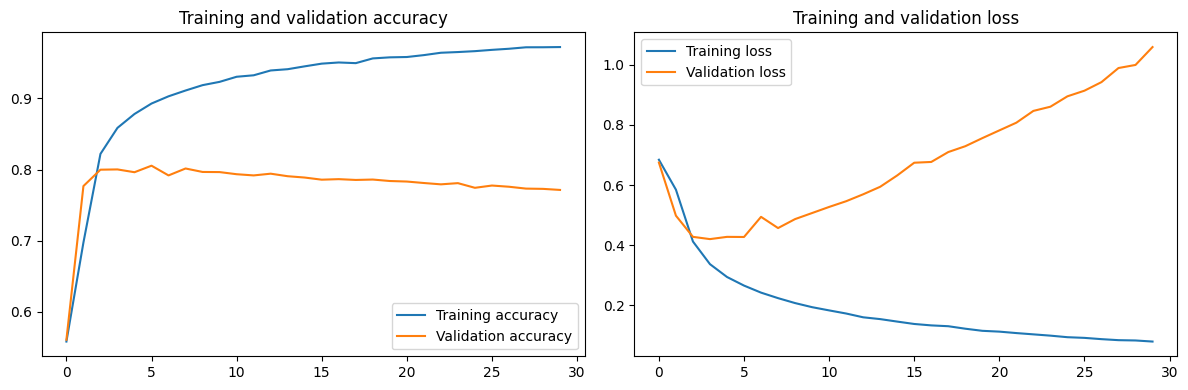

In [25]:
# Vẽ lại biểu đồ quá trình huấn luyện
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs = axs.flatten()
axs[0].plot(train_acc, label="Training accuracy")
axs[0].plot(val_acc, label="Validation accuracy")
axs[0].legend()
axs[0].set_title("Training and validation accuracy")

axs[1].plot(loss_acc, label="Training loss")
axs[1].plot(val_loss, label="Validation loss")
axs[1].legend()
axs[1].set_title("Training and validation loss")

plt.tight_layout()
plt.show()

Uầy cái đường đo loss của **val** trắc trở như đường tình của mình vậy :v  
Có vẻ như là mô hình đã không hoạt động hiệu quả trên tập dữ liệu **val** của chúng ta rồi, rơi vào trường hợp **quá khớp (Overfitting)**. 😓  

Accuracy trên tập **train** rõ ràng rất cao nhưng trên tập **val** lại cách biệt rõ hơn. Khi qua kiểm tra bên biểu đồ **Loss** thì điều này càng được biểu diễn rõ rệt hơn khi mà lỗi trên tập **val** cách biệt hoàn toàn và tăng lên một cách rõ rệt so với tập **train**. 📉  

Nhưng nghĩ lại thì cũng hợp lý mà, tập dữ liệu xác thực hay hiệu chỉnh (val) có thể chứa những từ không nằm trong danh sách từ mã hóa hay nói cách khác là các token **< OOV >**. 🔄 Do đó dẫn đến việc với các dữ liệu mới quá nhiều mô hình hoạt động không còn hiệu quả nữa.  

Mọi người đừng quá bất ngờ nha, thực ra thì tình trạng **quá khớp (Overfitting)** trong các **mô hình NLP** diễn ra là điều hết sức bình thường bởi do **bản chất không thể nào đoán trước được ngôn ngữ**. Số lượng từ vựng trong mỗi ngôn ngữ là vô cùng lớn chưa kể việc có rất nhiều ngôn ngữ nên để mà có đầy đủ hết được số lượng từ là điều không thể, nó là một con số khổng lồ và không thể xác định được. 🗣️  

Trong các phần tiếp theo, tụi mình sẽ đi tìm cách giải quyết, làm giảm sự tác động của tình trạng trên thông qua một vài kỹ thuật nha. 🔧  


# Reducing Overfitting in Language Models  
### (Làm giảm tình trạng quá khớp trong các mô hình ngôn ngữ) 🔧  

Tình trạng **quá khớp (Overfitting)** xảy ra khi một mô hình trở nên quá chú trọng trên tập dữ liệu huấn luyện. Một trong số những nguyên nhân đến từ việc chúng tương thích quá tốt với các **mẫu dữ liệu nhiễu** trong **tập huấn luyện (train)**. Tuy nhiên, các **dữ liệu nhiễu** đó lại không xuất hiện trong **tập hiệu chỉnh (val)**, khiến cho mô hình trở nên tệ trong việc kiểm tra. 😓  

Do đó, chúng ta sẽ tiến hành tìm hiểu một vài thủ thuật để **khái quát hóa mô hình** cũng như làm **giảm đi tính quá khớp** với các mô hình ngôn ngữ. 📚  


# Phương pháp Adjusting the Learning Rate  
### (Điều chỉnh tốc độ học)


Một trong số những nguyên nhân lớn dẫn đến tình trạng quá khớp mà mọi người gặp phải chính là vấn đề về **tốc độ học (learning rate)**. 🚀  
Khi tham số này trở nên **quá cao**, đồng nghĩa với việc mô hình học **quá nhanh**, dẫn đến việc học quá mức ở một số đặc trưng nhưng lại đi nhanh và có thể bỏ lỡ một số đặc trưng khác.  

Tụi mình thường dùng một hàm cơ bản để định nghĩa các phần tham số và phương pháp học cho mô hình như này đúng không: 💡  


```python
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
```
Thì phương thức trên gọi sẵn hàm **adam** với các tham số mặc định, giờ đây tụi mình sẽ tiến hành tinh chỉnh **tham số tốc độ học (learning rate)** cụ thể hơn.

```python
adam = tf.keras.optimizer.Adam(learning_rate=0.0001,
                                beta_1=0.9, beta_2=0.999,
                                amsgrad=False)

```

Tham số **learning rate** mặc định là **0.001**, tụi mình đổi nó thành **0.0001**. 🔧  
Còn lại các tham số khác mình vẫn để mặc định.  

Mọi người có thể tự tìm hiểu thêm nha. 📚 Ở đây mình chỉ nói ngắn gọn:  
- **beta1** và **beta2**: Liên quan đến hệ số giảm dần của các giá trị.  
- **amsgrad**: Chỉ định có sử dụng một dạng biến thể tối ưu hóa của thuật toán **Adam** không. 🤔  




Bây giờ mình sẽ tiến hành định nghĩa lại mô hình và huấn luyện nó với **100 epochs** nha.

In [26]:
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model_1 = Sequential([
    Embedding(10000, 16, input_shape=(None,)),
  	GlobalAveragePooling1D(),
  	Dense(24, activation="relu"),
  	Dense(1, activation="sigmoid")
])

adam = Adam(learning_rate=0.0001,
            beta_1=0.9, beta_2=0.999,
            amsgrad=False)

model_1.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])

In [27]:
import time
# Tính thời gian huấn luyện
start_time = time.time()
history1 = model_1.fit(train_padded, train_labels, epochs=100, validation_data=(test_padded, test_labels))
end_time = time.time()
# Lấy danh sách thông số từ lịch sử huấn luyện ra
train_acc = history1.history["accuracy"]
val_acc = history1.history["val_accuracy"]
loss_acc = history1.history["loss"]
val_loss = history1.history["val_loss"]

Epoch 1/100
668/668 [==============================] - 4s 4ms/step - loss: 0.6898 - accuracy: 0.5510 - val_loss: 0.6868 - val_accuracy: 0.5608
Epoch 2/100
668/668 [==============================] - 2s 3ms/step - loss: 0.6856 - accuracy: 0.5611 - val_loss: 0.6850 - val_accuracy: 0.5608
Epoch 3/100
668/668 [==============================] - 2s 3ms/step - loss: 0.6846 - accuracy: 0.5611 - val_loss: 0.6845 - val_accuracy: 0.5608
Epoch 4/100
668/668 [==============================] - 2s 3ms/step - loss: 0.6840 - accuracy: 0.5611 - val_loss: 0.6838 - val_accuracy: 0.5608
Epoch 5/100
668/668 [==============================] - 2s 3ms/step - loss: 0.6831 - accuracy: 0.5611 - val_loss: 0.6828 - val_accuracy: 0.5608
Epoch 6/100
668/668 [==============================] - 3s 4ms/step - loss: 0.6817 - accuracy: 0.5611 - val_loss: 0.6813 - val_accuracy: 0.5608
Epoch 7/100
668/668 [==============================] - 2s 3ms/step - loss: 0.6798 - accuracy: 0.5611 - val_loss: 0.6792 - val_accuracy: 0.5608

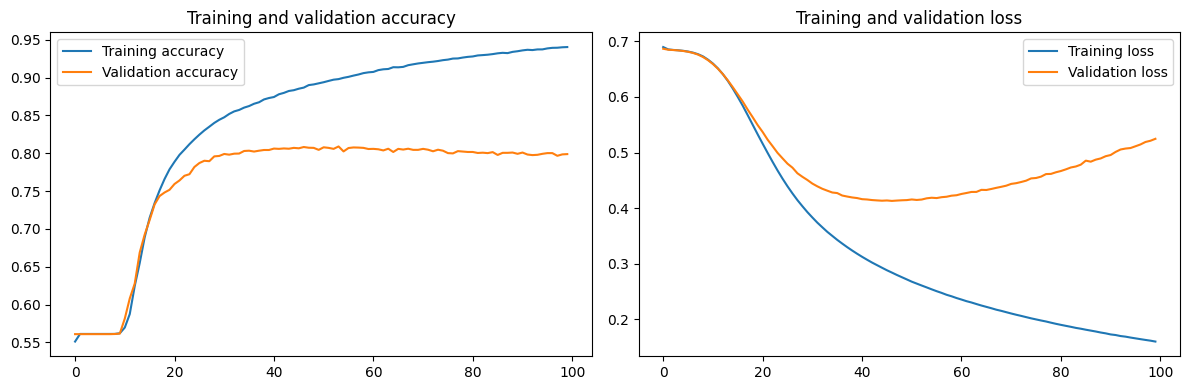

In [28]:
# Vẽ lại biểu đồ quá trình huấn luyện
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs = axs.flatten()
axs[0].plot(train_acc, label="Training accuracy")
axs[0].plot(val_acc, label="Validation accuracy")
axs[0].legend()
axs[0].set_title("Training and validation accuracy")

axs[1].plot(loss_acc, label="Training loss")
axs[1].plot(val_loss, label="Validation loss")
axs[1].legend()
axs[1].set_title("Training and validation loss")

plt.tight_layout()
plt.show()

In [29]:
# Kết quả đánh giá mô hình
eval1 = model_1.evaluate(test_padded, test_labels)
print("Loss: ", eval1[0])
print("Accuracy: ", eval1[1])

167/167 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7988
Loss:  0.524761974811554
Accuracy:  0.7987645268440247


Mọi người có thể rằng việc giảm tốc độ học đi nhiều có tác động sâu sắc tới mô hình.  
Cụ thể hơn là **loss** đã giảm đi hơn nhiều so với mô hình trước đó ngay cả khi ta so ở mức **epoch** thứ 30.  

Dựa trên biểu đồ **độ chính xác (accuracy)**, ở các **epoch** đầu tiên, mọi người có thể thấy mạng không học, chúng chỉ loanh quanh mức **0.5** trước khi có sự bùng nổ và đột phá về **độ chính xác**, học một cách nhanh chóng. 📈  

Khi ta chuyển sang khám phá biểu đồ **độ lỗi (loss)**, chúng ta có thể thấy ngay cả khi độ chính xác không tăng ở các **epoch** đầu thì **loss vẫn có sự giảm đi**. 🔍  
Do đó bạn có thể tin rằng mô hình hay mạng lưới sẽ bắt đầu học sau một khoảng thời gian nếu chúng ta quan sát qua từng **epoch**. ⏳  


Mọi người có thể rằng việc giảm tốc độ học đi nhiều có tác động sâu sắc tới mô hình.  
Cụ thể hơn là **loss** đã giảm đi hơn nhiều so với mô hình trước đó ngay cả khi ta so ở mức **epoch** thứ 30.  

Dựa trên biểu đồ **độ chính xác (accuracy)**, ở các **epoch** đầu tiên, mọi người có thể thấy mạng không học, chúng chỉ loanh quanh mức **0.5** trước khi có sự bùng nổ và đột phá về **độ chính xác**, học một cách nhanh chóng. 📈  

Khi ta chuyển sang khám phá biểu đồ **độ lỗi (loss)**, chúng ta có thể thấy ngay cả khi độ chính xác không tăng ở các **epoch** đầu thì **loss vẫn có sự giảm đi**. 🔍  
Do đó bạn có thể tin rằng mô hình hay mạng lưới sẽ bắt đầu học sau một khoảng thời gian nếu chúng ta quan sát qua từng **epoch**. ⏳  


Tất nhiên, việc điều chỉnh tốc độ học này chỉ là một cách đơn giản để tối ưu hóa mô hình, tuy nhiên vẫn còn một vài cách khác nữa mà chúng ta sẽ thực hiện tiếp theo để cải thiện mô hình. 💡  

Trong một vài ví dụ tiếp theo trong việc cải thiện mô hình, mình vẫn sẽ sử dụng hàm **Adam cơ bản**.  

> **Tại sao lại vậy?** 🤔  

Đơn giản là vì mình không muốn việc dùng phương pháp **điều chỉnh tốc độ học (learning rate)** sẽ làm lu mờ hay khó nhận ra hiệu quả của các phương pháp khác.  


# Phương pháp 2: Exploring Vocabulary Size  
### (Khám phá kích thước từ điển, số lượng từ vựng) 📚  

Về cơ bản thì tất cả dữ liệu đều là từ vựng, nên tụi mình sẽ đi khám phá xem thử các từ trong bộ dữ liệu cũng như **tần suất** của chúng. 📊  
Biết đâu rằng có thể tìm ra được **manh mối** nào hữu ích cho việc làm giảm đi sự **quá khớp** của mô hình. 🔍  


Mọi nngười có thể sử dụng hàm **word_counts** có sẵn của **tokenizer** để xem tần suất xuất hiện của các từ nha.

In [30]:
wc = tokenizer.word_counts
print(wc)

OrderedDict([('annoying', 13), ('ad', 68), ('turns', 41), ('man', 1025), ('pro', 35), ('whaling', 1), ('david', 46), ('cameron', 7), ('scottish', 7), ('people', 298), ('ill', 21), ('kill', 56), ('leave', 45), ('report', 408), ('texting', 3), ('driving', 43), ('okay', 14), ('look', 124), ('every', 159), ('couple', 95), ('seconds', 21), ('verizon', 6), ('introduces', 85), ('new', 1224), ('charge', 17), ('whim', 2), ('plan', 127), ('kim', 55), ('kardashian', 31), ('wants', 113), ('everyone', 90), ('honest', 8), ('kanye', 18), ('outrage', 8), ('erupts', 7), ('mark', 53), ('wahlberg', 3), ('made', 120), ('1', 109), ('000', 154), ('times', 71), ('michelle', 33), ('williams', 37), ('launched', 3), ('platform', 10), ('empower', 8), ('survivors', 25), ('bullying', 11), ('witching', 1), ('hour', 54), ('revisited', 2), ('woman', 357), ('shot', 66), ('former', 84), ('boyfriend', 27), ('chicago', 35), ('nordstrom', 3), ('store', 43), ('dies', 62), ('sharing', 12), ('dreams', 32), ('important', 38),

In [31]:
from collections import OrderedDict
wc_sorted = OrderedDict(sorted(wc.items(), key=lambda x: x[1], reverse=True))
print(wc_sorted)

OrderedDict([('new', 1224), ('trump', 1044), ('man', 1025), ('one', 447), ('report', 408), ('donald', 400), ('area', 400), ('year', 397), ('u', 384), ('day', 362), ('woman', 357), ('says', 356), ('time', 347), ('first', 332), ('trumps', 321), ('like', 315), ('old', 308), ('get', 307), ('people', 298), ('life', 298), ('obama', 293), ('make', 280), ('house', 267), ('still', 264), ('white', 255), ('back', 255), ('women', 245), ('clinton', 243), ('5', 242), ('world', 235), ('could', 223), ('years', 223), ('black', 221), ('americans', 220), ('family', 218), ('way', 215), ('study', 208), ('would', 199), ('school', 199), ('best', 197), ('gop', 196), ('show', 195), ('really', 193), ('american', 193), ('3', 189), ('cant', 187), ('watch', 186), ('police', 186), ('last', 184), ('home', 184), ('going', 183), ('bill', 183), ('good', 183), ('death', 180), ('nation', 180), ('know', 176), ('president', 174), ('state', 173), ('health', 172), ('finds', 172), ('10', 169), ('say', 168), ('video', 168), ('

In [32]:
wc_sorted['new']

1224

Tụi mình sẽ tiến hành vẽ biểu đồ xem thử tần suất xuất hiện của các từ nha. 📊  
- Trục **Ox** sẽ là **thứ tự của từ**, từ thứ nhất sẽ là 1, từ thứ 2 là 2, cứ như vậy tăng lên.  
- Trục **Oy** chính là **tần suất của từ**. 📈  


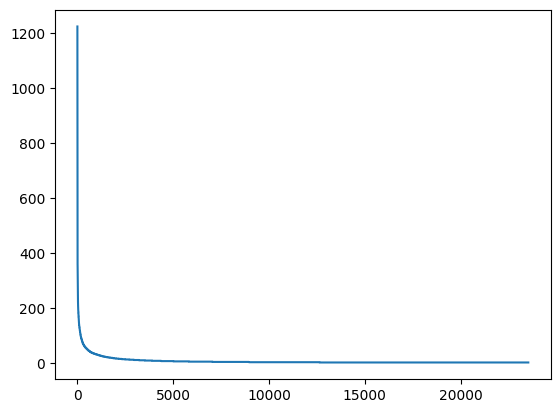

In [33]:
import matplotlib.pyplot as plt

xs=[]
ys=[]
curl_x = 1
for w in wc_sorted:
  xs.append(curl_x)
  ys.append(wc_sorted[w])
  curl_x+=1

plt.plot(xs, ys)
plt.show()

Biểu đồ vẽ ra như mọi người thấy ở trên được gọi là **"hockey stick" curve**, tạm dịch là **đường cong khúc côn cầu** nha. 🏒  

Hmmm, qua biểu đồ ta có thể thấy được là **rất ít từ được sử dụng nhiều lần**, phần giá trị cao rất nhỏ, trong khi đó đại đa số các từ khác đều được sử dụng rất ít. Tuy nhiên, mọi từ đều được đánh giá hiệu quả như nhau bởi đều có mặt trong phần embedding. Với việc cung cấp một tập huấn luyện lớn như vậy so với tập kiểm tra dùng để hiệu chỉnh (**val**), thì sẽ có nhiều từ trong tập huấn luyện không xuất hiện trong tập hiệu chỉnh.  

Tụi mình sẽ tiến hành quan sát rõ hơn với các từ có chỉ mục trong khoảng **từ 300 đến 10000** trên trục **Ox** nha. Với trục **Oy** có thang đo từ **0 đến 100**. 🔍  


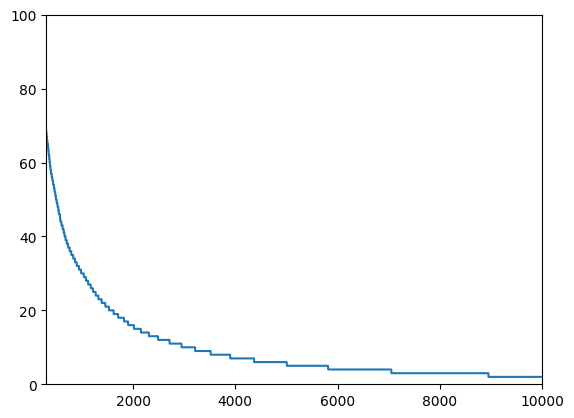

In [34]:
plt.plot(xs, ys)
plt.axis([300, 10000, 0, 100])
plt.show()

Tại sao lại quan sát **dưới khoảng 10.000**? Đơn giản là vì ở mô hình trước đó, tuy tổng cộng bộ dữ liệu có hơn **20.000** từ nhưng ta chỉ cài đặt tham số **vocab_size là 10.000**, nên ta sẽ tiến hành quan sát dữ liệu trong khoảng này. 🔍  

Mọi người có thể thấy rõ các từ có chỉ mục **từ 2.000 đến 10.000** đại diện cho **80% dữ liệu huấn luyện** của ta, nhưng số lần sử dụng của mỗi từ chỉ **dưới 20 lần**. Trong khi các từ ở trước, tức trong khoảng **dưới 2.000**, lại có số lần sử dụng quá cao. 📊  

Điều này có thể dẫn đến tình trạng **quá khớp**. Do đó, chúng ta sẽ thử **giảm kích thước, số lượng từ sử dụng** xuống chỉ còn **2.000** để có số lượng, tần suất phân bổ hợp lý hơn, không bị chênh lệch quá nhiều. 📉  


In [35]:
# Khởi tạo lại tokenizer với kích thước 2000
tokenizer2k = Tokenizer(num_words=2000, oov_token="<OOV>")
tokenizer2k.fit_on_texts(train_sequences)
word_index_2k = tokenizer2k.word_index
print("Xem tập từ điển: ", word_index_2k)

Xem tập từ điển:  {'<OOV>': 1, 'new': 2, 'trump': 3, 'man': 4, 'one': 5, 'report': 6, 'donald': 7, 'area': 8, 'year': 9, 'u': 10, 'day': 11, 'woman': 12, 'says': 13, 'time': 14, 'first': 15, 'trumps': 16, 'like': 17, 'old': 18, 'get': 19, 'people': 20, 'life': 21, 'obama': 22, 'make': 23, 'house': 24, 'still': 25, 'white': 26, 'back': 27, 'women': 28, 'clinton': 29, '5': 30, 'world': 31, 'could': 32, 'years': 33, 'black': 34, 'americans': 35, 'family': 36, 'way': 37, 'study': 38, 'would': 39, 'school': 40, 'best': 41, 'gop': 42, 'show': 43, 'really': 44, 'american': 45, '3': 46, 'cant': 47, 'watch': 48, 'police': 49, 'last': 50, 'home': 51, 'going': 52, 'bill': 53, 'good': 54, 'death': 55, 'nation': 56, 'know': 57, 'president': 58, 'state': 59, 'health': 60, 'finds': 61, '10': 62, 'say': 63, 'video': 64, 'parents': 65, 'things': 66, 'right': 67, 'mom': 68, 'kids': 69, 'love': 70, '2': 71, 'every': 72, 'may': 73, 'hillary': 74, 'big': 75, 'party': 76, '000': 77, 'getting': 78, 'gets': 7

In [36]:
# Mã hóa cho tập train và tập test
train_sequences_encoded_2k = tokenizer2k.texts_to_sequences(train_sequences)
test_sequences_encoded_2k = tokenizer2k.texts_to_sequences(test_sequences)

In [37]:
padding_type = "post"
trunc_type = "post"
max_length = 100

# Tiến hành đệm cho bộ dữ liệu
train_padded_2k = pad_sequences(train_sequences_encoded_2k,
                             maxlen = max_length,
                             padding = padding_type,
                             truncating = trunc_type)

test_padded_2k = pad_sequences(test_sequences_encoded_2k,
                            maxlen = max_length,
                            padding = padding_type,
                            truncating = trunc_type)

In [38]:
# Chuyển tất cả sang dạng numpy array
train_padded_2k = np.array(train_padded_2k)
test_padded_2k = np.array(test_padded_2k)


In [39]:
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model_2 = Sequential([
    Embedding(2000, 16, input_shape=(None,)),
  	GlobalAveragePooling1D(),
  	Dense(24, activation="relu"),
  	Dense(1, activation="sigmoid")
])


model_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
import time
# Tính thời gian huấn luyện
start_time = time.time()
history2 = model_2.fit(train_padded_2k, train_labels, epochs=100, validation_data=(test_padded_2k, test_labels))
end_time = time.time()
# Lấy danh sách thông số từ lịch sử huấn luyện ra
train_acc = history2.history["accuracy"]
val_acc = history2.history["val_accuracy"]
loss_acc = history2.history["loss"]
val_loss = history2.history["val_loss"]

Epoch 1/100
668/668 [==============================] - 2s 2ms/step - loss: 0.6822 - accuracy: 0.5596 - val_loss: 0.6666 - val_accuracy: 0.5666
Epoch 2/100
668/668 [==============================] - 1s 2ms/step - loss: 0.6067 - accuracy: 0.6719 - val_loss: 0.5581 - val_accuracy: 0.7003
Epoch 3/100
668/668 [==============================] - 2s 3ms/step - loss: 0.4956 - accuracy: 0.7649 - val_loss: 0.4831 - val_accuracy: 0.7626
Epoch 4/100
668/668 [==============================] - 1s 2ms/step - loss: 0.4457 - accuracy: 0.7874 - val_loss: 0.4666 - val_accuracy: 0.7675
Epoch 5/100
668/668 [==============================] - 2s 2ms/step - loss: 0.4234 - accuracy: 0.8003 - val_loss: 0.4873 - val_accuracy: 0.7486
Epoch 6/100
668/668 [==============================] - 2s 2ms/step - loss: 0.4128 - accuracy: 0.8056 - val_loss: 0.4586 - val_accuracy: 0.7688
Epoch 7/100
668/668 [==============================] - 2s 3ms/step - loss: 0.4058 - accuracy: 0.8080 - val_loss: 0.4600 - val_accuracy: 0.7686

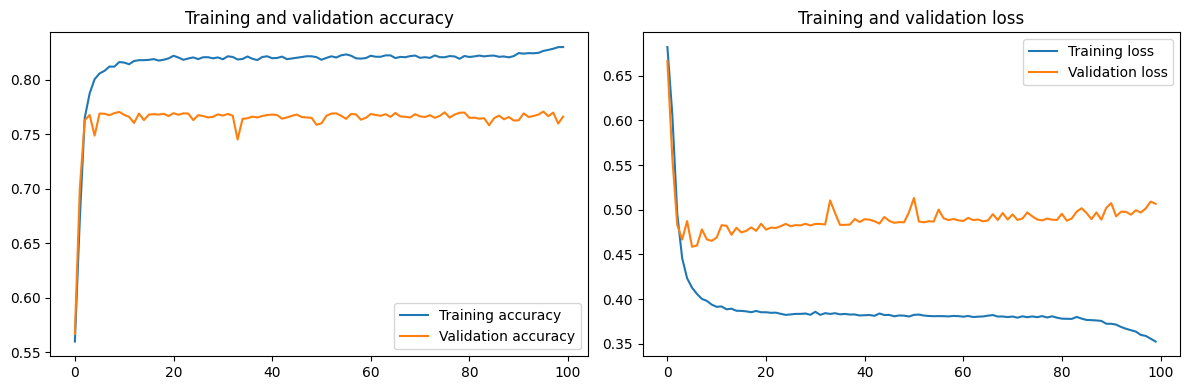

In [41]:
# Vẽ lại biểu đồ quá trình huấn luyện
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs = axs.flatten()
axs[0].plot(train_acc, label="Training accuracy")
axs[0].plot(val_acc, label="Validation accuracy")
axs[0].legend()
axs[0].set_title("Training and validation accuracy")

axs[1].plot(loss_acc, label="Training loss")
axs[1].plot(val_loss, label="Validation loss")
axs[1].legend()
axs[1].set_title("Training and validation loss")

plt.tight_layout()
plt.show()

Ồ, mọi người thấy đấy, **tỷ lệ loss đã giảm đi rất nhiều rồi**, cái cuối cùng cũng chỉ **0.475**, mặc dù tổng thể loss vẫn có tăng nhẹ, tuy nhiên tốc độ đã giảm đi rất nhiều **không bị tăng lên đột ngột**. 📉  

Ngoài ra, mọi người cũng thấy các đường train và loss đều **lên xuống thất thường** mặc dù tổng thể thì **vẫn hiệu quả**, đúng không? Điều này thường xuất phát từ việc **tốc độ học (learning rate) cao**, dẫn đến mô hình khó nhận biết và hội tụ, do đó các đường sẽ bị lên xuống thất thường như vậy.  

Như ví dụ trước đó về việc **điều chỉnh tốc độ học thấp hơn**, đường biểu diễn độ chính xác và lỗi **mượt mà** hơn nhiều. 📊  


# Tổng kết phương pháp điều chỉnh kích thước từ vựng (vocab size)  

Mọi người có thể thử nghiệm thêm nhiều **kích thước từ vựng** khác nha. Ở đây mình dựa trên biểu đồ rồi chọn con số **2.000**, tương ứng với các từ có tần suất xuất hiện từ **20 lần trở lên**. 📊  

Mọi người có thể thử những **con số nhỏ hơn** cũng được. 🔍  


Nói chung phương pháp này là tập trung vào học những từ có số lần xuất hiện chiếm đa số thôi, còn bỏ bớt các từ có số lần xuất hiện thấp hơn

# Exploring Embedding Dimensions (Khám phá các chiều không gian của vector biểu diễn)  

Ở ví dụ tiếp theo này, tụi mình sẽ cùng tìm hiểu về việc **mở rộng chiều không gian của embedding** nha. Như ở mô hình hiện tại chúng ta đang triển khai là **16**, và nó thật sự là một con số **ngẫu nhiên** nha =)).  

> **Liệu con số 16 chiều có phải là một con số tốt không?** 🤔  

Giả định chúng ta vẫn sử dụng **vocab size là 2.000** thì có vẻ việc để đến tận **16 chiều** có vẻ là một con số **khá lớn**, và nó có thể dẫn đến việc gia tăng **độ thưa thớt** của dữ liệu trong **không gian đa chiều**.  

Ở đây, theo như cách mình đọc được trong sách thì con số tốt nhất cho số chiều hay kích thước embedding là **bằng căn bậc 4 của kích thước từ vựng (vocab size)**:  

$$\huge \sqrt[4]{x}$$  

Với khoảng **2.000** từ vựng, ta sẽ có **kích thước embedding** xấp xỉ là **7**.  

Do đó, ta sẽ tiến hành huấn luyện lại mô hình với sự thay đổi như trên. Về kết quả độ chính xác hay tỷ lệ lỗi, chúng ta có thể chưa biết trước, nhưng có một điều có thể xảy ra là **thời gian huấn luyện sẽ nhanh hơn rất nhiều** bởi kích thước dữ liệu cũng như số phép tính toán đã được giảm đi đáng kể. ⚡  


In [42]:
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model_3 = Sequential([
    Embedding(2000, 7, input_shape=(None,)),
  	GlobalAveragePooling1D(),
  	Dense(24, activation="relu"),
  	Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
import time
# Tính thời gian huấn luyện
start_time = time.time()
history3 = model_3.fit(train_padded_2k, train_labels, epochs=100, validation_data=(test_padded_2k, test_labels))
end_time = time.time()

# Lấy danh sách thông số từ lịch sử huấn luyện ra
train_acc = history3.history["accuracy"]
val_acc = history3.history["val_accuracy"]
loss_acc = history3.history["loss"]
val_loss = history3.history["val_loss"]

Epoch 1/100
668/668 [==============================] - 2s 2ms/step - loss: 0.6857 - accuracy: 0.5588 - val_loss: 0.6832 - val_accuracy: 0.5608
Epoch 2/100
668/668 [==============================] - 1s 2ms/step - loss: 0.6648 - accuracy: 0.5925 - val_loss: 0.6301 - val_accuracy: 0.6464
Epoch 3/100
668/668 [==============================] - 1s 2ms/step - loss: 0.5756 - accuracy: 0.7125 - val_loss: 0.5444 - val_accuracy: 0.7338
Epoch 4/100
668/668 [==============================] - 1s 2ms/step - loss: 0.4995 - accuracy: 0.7639 - val_loss: 0.4942 - val_accuracy: 0.7574
Epoch 5/100
668/668 [==============================] - 2s 3ms/step - loss: 0.4593 - accuracy: 0.7838 - val_loss: 0.4732 - val_accuracy: 0.7638
Epoch 6/100
668/668 [==============================] - 1s 2ms/step - loss: 0.4371 - accuracy: 0.7944 - val_loss: 0.4640 - val_accuracy: 0.7688
Epoch 7/100
668/668 [==============================] - 1s 2ms/step - loss: 0.4243 - accuracy: 0.8001 - val_loss: 0.4599 - val_accuracy: 0.7677

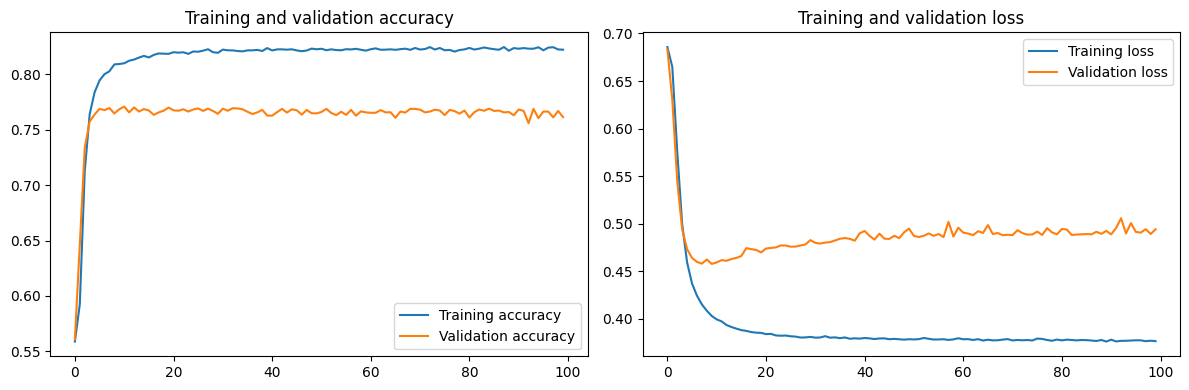

In [44]:
# Vẽ lại biểu đồ quá trình huấn luyện
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs = axs.flatten()
axs[0].plot(train_acc, label="Training accuracy")
axs[0].plot(val_acc, label="Validation accuracy")
axs[0].legend()
axs[0].set_title("Training and validation accuracy")

axs[1].plot(loss_acc, label="Training loss")
axs[1].plot(val_loss, label="Validation loss")
axs[1].legend()
axs[1].set_title("Training and validation loss")

plt.tight_layout()
plt.show()

In [45]:
# Kết quả đánh giá mô hình
eval3 = model_3.evaluate(test_padded_2k, test_labels)
print("Loss: ", eval3[0])
print("Accuracy: ", eval3[1])# Kết quả đánh giá mô hình
eval3 = model_3.evaluate(test_padded_2k, test_labels)
print("Loss: ", eval3[0])
print("Accuracy: ", eval3[1])

167/167 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7613
Loss:  0.4941534996032715
Accuracy:  0.7613253593444824
167/167 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7613
Loss:  0.4941534996032715
Accuracy:  0.7613253593444824


Theo như tác giả nói thì tuy là độ hiệu quả của mô hình không thay đổi nhiều lắm, tuy nhiên tốc độ hội tụ ở tập train lại nhanh hơn rất nhiều. Ngoài ra tác giả có đề cập thời gian huấn luyện có thể **nhanh hơn 30%**. ⚡  

---  

**P/s:** Khúc này mình cũng hơi lú, về lý thuyết thì là vậy, nhưng có vẻ như ở trường hợp hay lần chạy của mình đã xảy ra ngoại lệ khi mà thời gian có vẻ tăng hơn trước. 🤔  
Theo mình tìm hiểu thì rất có thể khi giảm số chiều đi khiến mô hình bị **mất mát thông tin quan trọng**, buộc chúng phải chạy **lâu hơn để tìm ra các điểm đặc biệt và hội tụ**.  

Sau khi tiến hành huấn luyện và thử nhiều lần thì mình nhận định rằng ở phương pháp **giảm chiều embedding** này, **đường biểu đồ có thể ổn định hơn** so với trước một ít. Tuy nhiên, còn về phần **thời gian huấn luyện**, thì chúng **không cố định, có lúc nhanh hơn, chậm hơn hoặc gần bằng nhau** tùy theo cách chia dữ liệu. Sau nhiều lần mình thử chia ngẫu nhiên thì nó không cố định nha. 🔄  


# Tổng kết phương pháp điều chỉnh số chiều không gian.  

Phương pháp này phần nào sẽ giúp mô hình ổn định hơn tí và đôi khi sẽ nhanh hơn một xíu. ⚡  


# Exploring the Model Architecture (Khám phá về kiến trúc mô hình)  

Ở phần này, tụi mình sẽ thử tiến hành phân tích và điều chỉnh kiến trúc mô hình nha.  

Kiến trúc mô hình ở phần trước của chúng ta là:  


```python
model_3 = Sequential([
    Embedding(2000, 7, input_shape=(None,)),
  	GlobalAveragePooling1D(),
  	Dense(24, activation="relu"),
  	Dense(1, activation="sigmoid")
])
```

Mọi người có thể thấy sau khi qua lớp **Embedding** và **GlobalAverage**, thì số chiều đầu ra hiện tại chỉ có **7**. Tuy nhiên, chúng lại được đưa vào **lớp tuyến tính (dense)** với **24 neurons**, có thể nói là **hơi quá mức cần thiết**. 🧐  

Tụi mình sẽ thử giảm xuống còn **8 neurons** xem sao nha. 🔧  


In [46]:
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model_4 = Sequential([
    Embedding(2000, 7, input_shape=(None,)),
  	GlobalAveragePooling1D(),
  	Dense(8, activation="relu"),
  	Dense(1, activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
import time
# Tính thời gian huấn luyện
start_time = time.time()
history4 = model_4.fit(train_padded_2k, train_labels, epochs=100, validation_data=(test_padded_2k, test_labels))
end_time = time.time()

# Lấy danh sách thông số từ lịch sử huấn luyện ra
train_acc = history4.history["accuracy"]
val_acc = history4.history["val_accuracy"]
loss_acc = history4.history["loss"]
val_loss = history4.history["val_loss"]

Epoch 1/100
668/668 [==============================] - 2s 2ms/step - loss: 0.6850 - accuracy: 0.5604 - val_loss: 0.6822 - val_accuracy: 0.5608
Epoch 2/100
668/668 [==============================] - 2s 2ms/step - loss: 0.6643 - accuracy: 0.5873 - val_loss: 0.6372 - val_accuracy: 0.6563
Epoch 3/100
668/668 [==============================] - 2s 3ms/step - loss: 0.5937 - accuracy: 0.6999 - val_loss: 0.5644 - val_accuracy: 0.7188
Epoch 4/100
668/668 [==============================] - 1s 2ms/step - loss: 0.5218 - accuracy: 0.7514 - val_loss: 0.5120 - val_accuracy: 0.7514
Epoch 5/100
668/668 [==============================] - 1s 2ms/step - loss: 0.4757 - accuracy: 0.7754 - val_loss: 0.4841 - val_accuracy: 0.7566
Epoch 6/100
668/668 [==============================] - 1s 2ms/step - loss: 0.4480 - accuracy: 0.7903 - val_loss: 0.4691 - val_accuracy: 0.7658
Epoch 7/100
668/668 [==============================] - 1s 2ms/step - loss: 0.4319 - accuracy: 0.7959 - val_loss: 0.4640 - val_accuracy: 0.7675

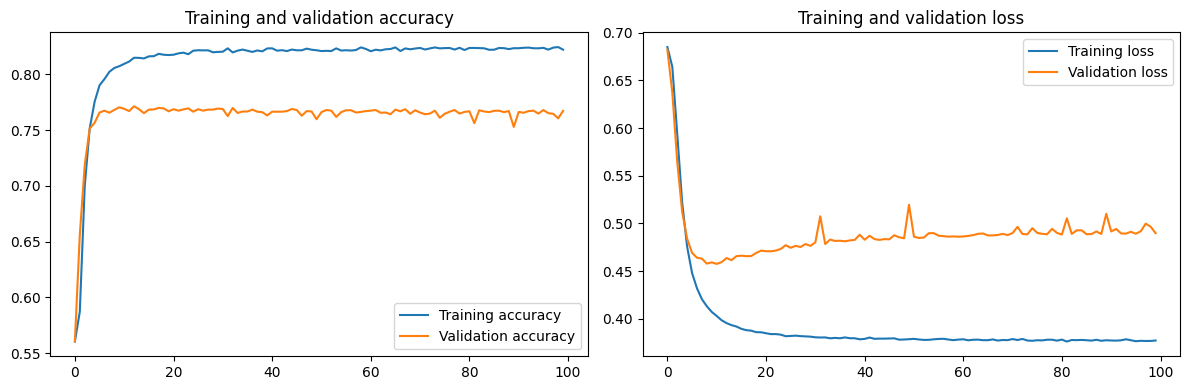

In [48]:
# Vẽ lại biểu đồ quá trình huấn luyện
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs = axs.flatten()
axs[0].plot(train_acc, label="Training accuracy")
axs[0].plot(val_acc, label="Validation accuracy")
axs[0].legend()
axs[0].set_title("Training and validation accuracy")

axs[1].plot(loss_acc, label="Training loss")
axs[1].plot(val_loss, label="Validation loss")
axs[1].legend()
axs[1].set_title("Training and validation loss")

plt.tight_layout()
plt.show()

Nhận xét thì, sau khi ta điều chỉnh số lượng **neuron xuống còn 8**, về kết quả thì vẫn tương tự nhau thôi, tuy nhiên biểu đồ đã ít biến động hơn nhiều rồi và có phần mịn hơn tí.

# Tổng kết về phương pháp điều chỉnh kiến trúc  

Cụ thể là ta điều chỉnh **số neurons trong lớp tuyến tính**, độ hiệu quả thì vẫn tương tự, tuy nhiên **độ biến động** trên biểu đồ đánh giá thì đã **ít hơn** nhiều. Hay nói cách khác, các đường cong trở nên mịn hơn. 📊  


# Using Dropout (Sử dụng cơ chế tắt ngẫu nhiên)  

Một trong những phương pháp hữu hiệu thường được sử dụng trong việc làm giảm đi tính **quá khớp - Overfitting** là sử dụng thêm **Dropout** cho **lớp tuyến tính**.  

Tụi mình sẽ sử dụng kiến trúc có sẵn ở trước làm tiền đề nha. Sở dĩ đến giờ mới áp dụng **dropout** vì mình muốn đợi cho đến khi các bước điều chỉnh như **vocab size, kích thước vector biểu diễn (embedding size), kiến trúc mô hình phức tạp hơn** được xử lý.  

Bởi những yếu tố này thường có tác động lớn đến với việc sử dụng kỹ thuật **dropout**.  

Không nói nhiều nữa, tụi mình sẽ đi vào áp dụng luôn nhé. 🚀  


In [49]:
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model_5 = Sequential([
    Embedding(2000, 7, input_shape=(None,)),
  	GlobalAveragePooling1D(),
  	Dense(8, activation="relu"),
		Dropout(0.25),
  	Dense(1, activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [50]:
import time
# Tính thời gian huấn luyện
start_time = time.time()
history5 = model_5.fit(train_padded_2k, train_labels, epochs=100, validation_data=(test_padded_2k, test_labels))
end_time = time.time()

# Lấy danh sách thông số từ lịch sử huấn luyện ra
train_acc = history5.history["accuracy"]
val_acc = history5.history["val_accuracy"]
loss_acc = history5.history["loss"]
val_loss = history5.history["val_loss"]

Epoch 1/100
668/668 [==============================] - 2s 2ms/step - loss: 0.6866 - accuracy: 0.5594 - val_loss: 0.6844 - val_accuracy: 0.5608
Epoch 2/100
668/668 [==============================] - 1s 2ms/step - loss: 0.6702 - accuracy: 0.5896 - val_loss: 0.6459 - val_accuracy: 0.6192
Epoch 3/100
668/668 [==============================] - 1s 2ms/step - loss: 0.6100 - accuracy: 0.6805 - val_loss: 0.5774 - val_accuracy: 0.7110
Epoch 4/100
668/668 [==============================] - 1s 2ms/step - loss: 0.5533 - accuracy: 0.7243 - val_loss: 0.5266 - val_accuracy: 0.7523
Epoch 5/100
668/668 [==============================] - 1s 2ms/step - loss: 0.5131 - accuracy: 0.7520 - val_loss: 0.4985 - val_accuracy: 0.7580
Epoch 6/100
668/668 [==============================] - 2s 3ms/step - loss: 0.4875 - accuracy: 0.7670 - val_loss: 0.4862 - val_accuracy: 0.7611
Epoch 7/100
668/668 [==============================] - 2s 2ms/step - loss: 0.4714 - accuracy: 0.7706 - val_loss: 0.4726 - val_accuracy: 0.7696

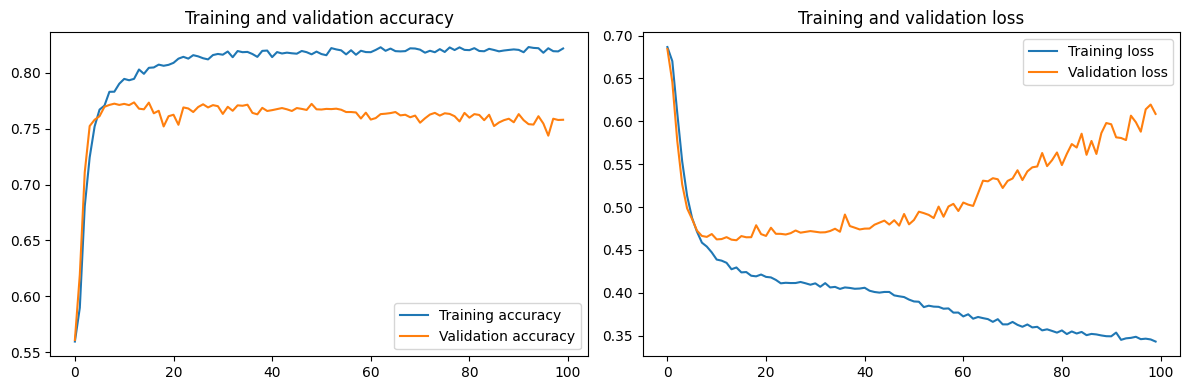

In [51]:
# Vẽ lại biểu đồ quá trình huấn luyện
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs = axs.flatten()
axs[0].plot(train_acc, label="Training accuracy")
axs[0].plot(val_acc, label="Validation accuracy")
axs[0].legend()
axs[0].set_title("Training and validation accuracy")

axs[1].plot(loss_acc, label="Training loss")
axs[1].plot(val_loss, label="Validation loss")
axs[1].legend()
axs[1].set_title("Training and validation loss")

plt.tight_layout()
plt.show()

In [52]:
# Kết quả đánh giá mô hình
eval5 = model_5.evaluate(test_padded_2k, test_labels)
print("Loss: ", eval5[0])
print("Accuracy: ", eval5[1])

167/167 [==============================] - 0s 1ms/step - loss: 0.6087 - accuracy: 0.7580
Loss:  0.6086600422859192
Accuracy:  0.7579558491706848


Uầy, quan sát phần đánh giá và biểu đồ, có vẻ như mô hình đã trở nên tệ hơn và quay lại trường hợp trước, **độ lỗi trên tập val đã tăng lên theo thời gian**. 😔  

Tuy không tệ hoàn toàn như trước, nhưng đây vẫn là một **quyết định tồi**, nó đã làm cho mô hình tệ hơn.  

Trong trường hợp này, khi **có quá ít số neuron** trong mạng thần kinh, việc dùng **dropout** lại tắt chúng đi nữa khiến mô hình trở nên yếu kém hơn hẳn. Đây không phải là một quyết định hay.  

Ta nên áp dụng **dropout** cho các mô hình phức tạp thì hợp lý hơn. 👍  

# Tổng kết về việc sử dụng cơ chế dropout  

Đây không phải là một quyết định hiệu quả với một mô hình đơn giản có số lượng neuron ít như trên. ❌  


# Using Regularization (Sử dụng phương pháp điều chuẩn, chính quy hóa)  

**P/s:** Trước khi bước vào phần này mình xin phép note lại trước, khuyến khích mọi người dùng tên **regularization** thay thế cho từ tiếng Việt. Từ này dịch ra thì cũng có nghĩa là chuẩn hóa, giống với **normalization**, tuy nhiên hai khái niệm này lại hoàn toàn khác nhau về đối tượng, cách thức hoạt động và tác dụng.  

Ở phần này, tụi mình sẽ tìm hiểu về một khái niệm mới mang tên là **Regularization** nha. 🔍  

Về tác dụng cơ bản, **Regularization** là một công cụ vô cùng hữu ích trong việc xử lý tình trạng **quá khớp (overfitting)**, giúp gia tăng khả năng khái quát mô hình thông qua việc **phạt** các neurons **có trọng số quá nặng**, quá chú trọng vào một yếu tố.  

Qua đó, mô hình có thể giảm được **tính phân cực của trọng số**. Mọi người có thể đọc [bài viết này](https://www.geeksforgeeks.org/regularization-in-machine-learning/) hoặc [blog này](https://viblo.asia/p/cac-phuong-phap-tranh-overfitting-gDVK24AmlLj) để tham khảo thêm nha. 🌐  


Chúng mình sẽ cùng đi vào tìm hiểu **2 loại regularization phổ biến** nha:  

- **L1 regularization**: Mọi người thường hay gọi nó là **lasso regularization**. Hiểu đơn giản thì nó giúp chúng ta **bỏ qua** các **trọng số bằng hoặc gần bằng 0** khi tiến hành tính toán kết quả của một lớp.  

- **L2 regularization**: Mọi người thường sẽ gọi nó là **ridge regression (hồi quy ridge)**. Chúng hoạt động dựa trên cơ chế **đẩy các giá trị ra xa** nhau hơn thông qua việc lấy bình phương của chúng. Qua đó, ta có thể **khuếch đại sự khác biệt** giữa các giá trị bằng 0 và khác 0.  

Ngoài ra, mọi người có thể kết hợp cả hai cái này lại với nhau tạo nên kỹ thuật **Elastic regularization**. 💡  


Trong ví dụ về bài toán **NLP** này, chúng ta sẽ sử dụng phương pháp **L2** nha. 💡  

Tụi mình sẽ áp dụng chúng dưới dạng một thuộc tính bên trong **lớp tuyến tính (Dense)**. Bên trong thuộc tính này, ta sẽ định nghĩa siêu tham số **regularization factor - tỷ lệ regularization** là **0.01**.  

Về cách chọn này, mọi người có thể linh hoạt thay đổi và thử nghiệm để cải thiện mô hình của mình nha. 🎛️  


In [53]:
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model_6 = Sequential([
    Embedding(2000, 7, input_shape=(None,)),
    GlobalAveragePooling1D(),
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Về kết quả mang lại, phương pháp này **không gây ra bất kỳ tác động cụ thể lớn nào tới mô hình** nên cũng không thay đổi gì mấy. 🤔  

Tuy nhiên, đường cong biểu thị **train loss và val loss** đã mượt hơn rất nhiều do **giảm thiểu được độ chênh lệch giữa các trọng số** ảnh hưởng đầu ra. 📉  


Sau học kĩ hơn từ 2 blog kia về cái này

# Tổng kết phương pháp regularization  

Ở mô hình triển khai lần này, mọi người có thể thấy chúng giúp quá trình huấn luyện **ít biến động hơn**, khiến cho đường **train loss** và **val loss** đều trở nên mượt hơn. 🌊  

Ngoài ra, phương pháp này còn góp phần một chút vào việc giảm tình trạng **quá khớp (overfitting)**, mặc dù dấu hiệu chưa rõ ràng lắm. 📉  


# Sử dụng thêm các phương pháp tối ưu hóa khác.  

Sau tất cả những phương pháp trên mà chúng ta đã cùng làm, tình trạng **quá khớp (overfitting)** đã được cải thiện đáng kể. ✅  

Tiếp đến, tụi mình sẽ cùng khám phá thêm thử có cách nào cải thiện hơn nữa không. 🔍  


Ở đây, tác giả thử điều chỉnh lại **độ dài tối đa cho bộ đệm** các chuỗi đầu vào. 🧩  

Tác giả nói rằng ở các ví dụ trên, chúng ta đã sử dụng con số là **100**. Vậy là mình đã đoán đúng con số độ dài tối đa cho bộ đệm mà tác giả đã dùng. 🎯  

Tác giả cũng nói ông chọn đại á **=))**.  

Tốt nhất là chúng ta nên đi thử quan sát, khám phá dữ liệu rồi tinh chỉnh lại nha, giống với lúc chúng ta phân tích để chọn **vocab size** từ **10.000** xuống còn **2.000** á. 🔍  


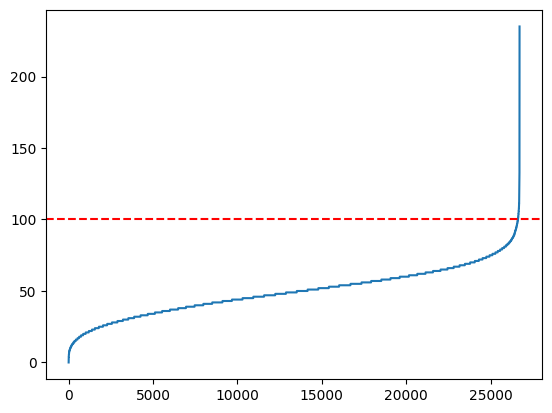

In [54]:
xs = []
ys = []
n_sentence_higher_100 = 0
current_item = 1
for item in headlines_preprocessed:
  xs.append(current_item)
  ys.append(len(item))
  if len(item) > 100:
    n_sentence_higher_100 += 1
  current_item += 1

newys = sorted(ys)

import matplotlib.pyplot as plt
plt.plot(xs, newys)
plt.axhline(y=100, color='r', linestyle='--')
plt.show()

In [55]:
print("Số lượng câu có từ 100 từ trở lên: ", n_sentence_higher_100)
print(f"Tỷ lệ câu có từ 100 từ trở lên trong bộ dữ liệu: {n_sentence_higher_100/len(headlines_preprocessed)*100:.2f}")

Số lượng câu có từ 100 từ trở lên:  94
Tỷ lệ câu có từ 100 từ trở lên trong bộ dữ liệu: 0.35


Uầy, vậy ra ông tác giả này chọn bừa thật :"))  

Mọi người có thể thấy đại đa số dữ liệu của chúng ta sau khi làm sạch **hầu như đều có độ dài dưới 100 từ hết**. 📊 Chỉ có **0.35%** là trên 100 từ, là **0.35** đó 🙏🏻.  

Ở đây, tác giả đề xuất là tụi mình có thể sử dụng **85** để thử nha (tất nhiên là vẫn chỉ dựa trên quan sát thôi).  

Nhưng mà đó là người ta sẽ làm vậy còn mình thì không :")). 😅  

>**Mọi người nhớ phần code để tính độ dài 95% các câu đều thỏa mãn mà mình đã code sẵn phía trên không?**  

Chính là nó đó, bây giờ tụi mình sẽ dùng nó để định nghĩa `max_length` cho phần bộ đệm này.  

Mình sẽ bắt đầu lại từ phần padding rồi huấn luyện nha. 🚀  


In [56]:
# Kiểm tra độ dài của câu dài nhất
list_len = [len(s) for s in headlines_preprocessed]
max_len = max(list_len)
mean_len = np.mean(list_len)
# Tính độ dài tối đa sao cho 95% các chuỗi có độ dài nhỏ hơn hoặc bằng giá trị này
max_len_95 = int(np.percentile(list_len, 95))
print("Độ dài tối đa with 95%: ", max_len_95)
print("Độ dài câu dài nhất: ", max_len)
print("Độ dài câu trung bình: ", mean_len)

Độ dài tối đa with 95%:  77
Độ dài câu dài nhất:  235
Độ dài câu trung bình:  49.43359916133139


In [57]:
train_padded_2k_77 = pad_sequences(train_sequences_encoded_2k, maxlen=77, padding="post", truncating="post")
test_padded_2k_77 = pad_sequences(test_sequences_encoded_2k, maxlen=77, padding="post", truncating="post")

In [58]:
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model_7 = Sequential([
    Embedding(2000, 7, input_shape=(None,)),
    GlobalAveragePooling1D(),
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
import time

start_time = time.time()
history7 = model_7.fit(train_padded_2k_77, train_labels, epochs=100, validation_data=(test_padded_2k_77, test_labels))
end_time = time.time()

Epoch 1/100
668/668 [==============================] - 2s 2ms/step - loss: 0.7093 - accuracy: 0.5586 - val_loss: 0.6874 - val_accuracy: 0.5608
Epoch 2/100
668/668 [==============================] - 1s 2ms/step - loss: 0.6860 - accuracy: 0.5611 - val_loss: 0.6857 - val_accuracy: 0.5608
Epoch 3/100
668/668 [==============================] - 1s 2ms/step - loss: 0.6857 - accuracy: 0.5611 - val_loss: 0.6856 - val_accuracy: 0.5608
Epoch 4/100
668/668 [==============================] - 1s 2ms/step - loss: 0.6852 - accuracy: 0.5611 - val_loss: 0.6837 - val_accuracy: 0.5608
Epoch 5/100
668/668 [==============================] - 1s 2ms/step - loss: 0.6742 - accuracy: 0.5830 - val_loss: 0.6630 - val_accuracy: 0.6434
Epoch 6/100
668/668 [==============================] - 1s 2ms/step - loss: 0.6432 - accuracy: 0.6817 - val_loss: 0.6333 - val_accuracy: 0.6893
Epoch 7/100
668/668 [==============================] - 2s 4ms/step - loss: 0.6109 - accuracy: 0.7205 - val_loss: 0.6084 - val_accuracy: 0.7170

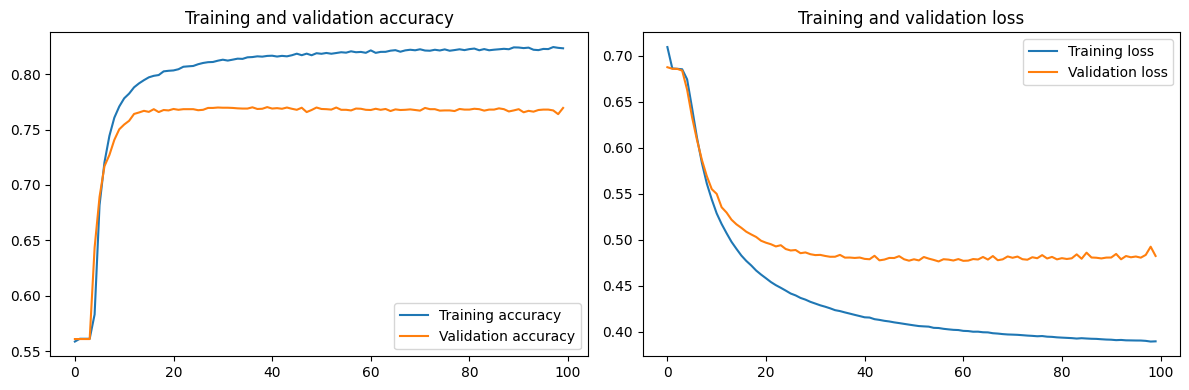

In [61]:
# Vẽ biểu đồ quá trình huấn luyện
train_acc = history7.history["accuracy"]
val_acc = history7.history["val_accuracy"]
loss_acc = history7.history["loss"]
val_loss = history7.history["val_loss"]

fig,axs = plt.subplots(1, 2, figsize=(12,4))
axs = axs.flatten()

axs[0].plot(train_acc, label="Training accuracy")
axs[0].plot(val_acc, label="Validation accuracy")
axs[0].legend()
axs[0].set_title("Training and validation accuracy")

axs[1].plot(loss_acc, label="Training loss")
axs[1].plot(val_loss, label="Validation loss")
axs[1].legend()
axs[1].set_title("Training and validation loss")

plt.tight_layout()
plt.show()

In [62]:
# Đánh giá mô hình
eval7 = model_7.evaluate(test_padded_2k_77, test_labels)
print("Loss: ", eval7[0])
print("Accuracy: ", eval7[1])

167/167 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.7696
Loss:  0.4823142886161804
Accuracy:  0.7695619463920593


Uầy, vậy là giờ chúng ta đã có một biểu đồ đẹp đấy chứ, các đường thẳng trông có vẻ **rất mượt**, đặc biệt là **train_loss**. 🌟  

Việc giảm kích thước **padding** này còn giúp ta **tránh việc phải đệm tất cả** cho hơn **26,000 câu** một cách vô nghĩa, quá lãng phí. 💡 Nó giúp tiết kiệm một phần lớn khối lượng tính toán ấy chứ. 🖥️

# Tổng kết về việc khám phá làm giảm đi kích thước padding  

✨ **Tiết kiệm được lượng lớn tính toán** và giảm thiểu sự **biến động trong quá trình huấn luyện**. 🎯  


# Visualizing the Embeddings (Trực quan hóa vector biểu diễn) 🌟

Ở các phần trước, chúng ta đã thực hiện **embedding** các chuỗi với **lớp embedding**, bây giờ chúng ta sẽ tiến hành trực quan hóa chúng để quan sát với công cụ **Embedding Projector** ha.  

Về cơ bản, công cụ này sử dụng thuật toán **PCA** để giảm chiều xuống còn 3, giúp dễ dàng quan sát hơn. Mọi người có thể tự viết hàm nếu muốn, nhưng mình chọn dùng web có sẵn cho nhanh. 🌐

Đầu tiên, tụi mình sẽ cần phải tạo ra một **chỉ mục từ đảo ngược** trước để chuyển đổi ngược lại từ chuỗi sang văn bản. Mọi người đã làm cái này ở **chương 5** trước đó rồi ý. 😉


In [63]:
# Lấy danh sách chỉ mục từ
word_index = tokenizer2k.word_index

In [64]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print(reverse_word_index)

{1: '<OOV>', 2: 'new', 3: 'trump', 4: 'man', 5: 'one', 6: 'report', 7: 'donald', 8: 'area', 9: 'year', 10: 'u', 11: 'day', 12: 'woman', 13: 'says', 14: 'time', 15: 'first', 16: 'trumps', 17: 'like', 18: 'old', 19: 'get', 20: 'people', 21: 'life', 22: 'obama', 23: 'make', 24: 'house', 25: 'still', 26: 'white', 27: 'back', 28: 'women', 29: 'clinton', 30: '5', 31: 'world', 32: 'could', 33: 'years', 34: 'black', 35: 'americans', 36: 'family', 37: 'way', 38: 'study', 39: 'would', 40: 'school', 41: 'best', 42: 'gop', 43: 'show', 44: 'really', 45: 'american', 46: '3', 47: 'cant', 48: 'watch', 49: 'police', 50: 'last', 51: 'home', 52: 'going', 53: 'bill', 54: 'good', 55: 'death', 56: 'nation', 57: 'know', 58: 'president', 59: 'state', 60: 'health', 61: 'finds', 62: '10', 63: 'say', 64: 'video', 65: 'parents', 66: 'things', 67: 'right', 68: 'mom', 69: 'kids', 70: 'love', 71: '2', 72: 'every', 73: 'may', 74: 'hillary', 75: 'big', 76: 'party', 77: '000', 78: 'getting', 79: 'gets', 80: 'campaign',

Tụi mình sẽ tiến hành trích xuất ngược lại trong số của **lớp embedding bên trong mô hình** để lấy ra các vector biểu diễn đại diện các từ.

In [66]:
e = model_7.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(2000, 7)


Kích thước mong muốn mà mọi người nhận được sẽ là **(2.000, 7)** với 7 là số chiều không gian và 2.000 là vocab_size. Tụi mình sẽ quan sát thử **vector biểu diễn** của một từ nha.

In [67]:
# Hiển thị từ thứ 5 trong danh sách
print(reverse_word_index[5])
# Hiển thị vector biểu diễn của từ đó
print(weights[5])

one
[ 0.09063785 -0.08108653 -0.05065015 -0.12345795  0.04775681 -0.04938455
  0.07440007]


Tụi mình sẽ tiến hành lưu thông tin embedding này lại dưới dạng các **file TSV** nha. Một file đại diện cho các chiều vetor và một file đại diện cho **metadata**.

In [68]:
import io
vocab_size=2000

out_v = io.open("vecs.tsv", "w", encoding="utf-8")
out_m = io.open("meta.tsv", "w", encoding="utf-8")
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write("\t".join([str(x) for x in embeddings]) + "\n")

out_v.close()
out_m.close()

Truy cập vào website [Embedding Projector](https://projector.tensorflow.org/) và dán 2 file vừa tạo vào phần tương ứng.

Ví như đây là lần chạy của mình.

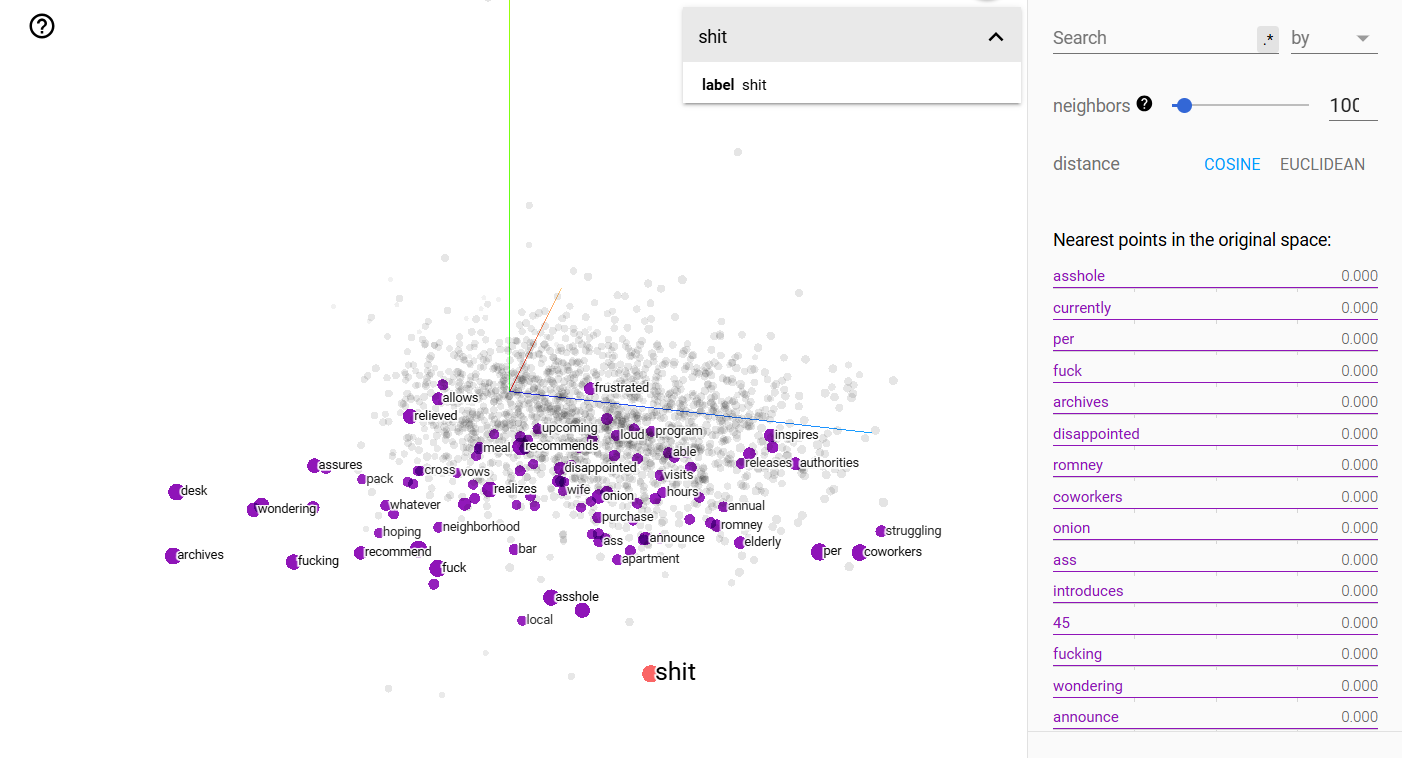

# Using Pretrained Embeddings from Tensorflow Hub (Sử dụng các bộ Embedding đã được huấn luyện sẵn trong Tensorflow Hub) 🌐  

Cái này chắc hầu hết mọi người không lạ gì rồi ha, bình thường mọi người sẽ nghe đến những cái tên như **"Hugging Face"** nhiều hơn nhưng trước kia chúng ta cũng từng có một sự lựa chọn được đại đa số nhiều người dùng là **"Tensorflow Hub"**.  

Thay vì phải huấn luyện các **bộ nhúng Embedding** để có thể mã hóa được các yếu tố ngữ nghĩa, thì giờ đây ta chỉ cần lấy các bộ đã được huấn luyện sẵn hết. 💡  

Ngoài ra, chúng còn có thể bao gồm cả phần **xử lý câu và tokenize** (việc tách các từ trong câu) một cách logic, cho nên bạn không cần phải xử lý thủ công các câu. 🌟 Ví dụ điển hình như đoạn này, thay vì phải thực hiện những bước như **tách từ, tạo từ điển, chuyển chuỗi rồi đệm**, bạn chỉ việc đưa thẳng câu văn vào **bộ nhúng Embedding** đó. 🙌  

In [69]:
# Lấy danh sách headlines và labels
headlines = sarcasm_headlines_dataset["headline"].tolist()
labels = sarcasm_headlines_dataset["is_sarcastic"].tolist()

In [70]:
training_size = 24000
training_sentences = headlines[:training_size]
testing_sentences = headlines[training_size:]
training_labels = labels[:training_size]
testing_labels = labels[training_size:]

In [71]:
# Load bộ hay lớp Embedding đã được huấn luyện sắn
import tensorflow_hub as hub

hub_layer = hub.KerasLayer(
    "https://www.kaggle.com/models/google/gnews-swivel/TensorFlow2/tf2-preview-20dim/1",
    output_shape=[20], input_shape=[],
    dtype=tf.string, trainable = False
)

Theo như thông tin mình đọc được, **bộ Embedding** này được huấn luyện dựa trên bộ dữ liệu **Swivel** với 130GB dữ liệu của Google. 📚✨  

Mọi người nhớ kỹ phần này nha, vì thực tế hiện nay, đa số các bài toán của chúng ta cơ bản hoạt động dựa trên nguyên tắc này: **mã hóa tất cả đầu vào thành dạng chuỗi hoặc ma trận số, sau đó đưa qua các lớp để học và phân loại**. 🧠🔢  

---  
*💡 Lưu ý: Khi thêm **lớp embedding** đã được huấn luyện sẵn vào, mọi người nhớ cài đặt tham số **trainable=False** để mô hình không tự cập nhật lại trọng số của **lớp embedding** nha.*

Bây giờ tụi mình sẽ tiến hành ráp vào kiến trúc mô hình lúc nãy để xem kết quả thay đổi ấn tượng như thế nào.

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model_hub = Sequential([
    hub_layer,
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

adam = Adam(learning_rate=0.0001) # Các tham số khác vẫn để mặc định nha.

model_hub.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])

In [73]:
import time
start_time = time.time()
history = model_hub.fit(training_sentences, training_labels, epochs=100, validation_data=(testing_sentences, testing_labels))
end_time = time.time()

Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 0.7392 - accuracy: 0.5613 - val_loss: 0.6759 - val_accuracy: 0.5939
Epoch 2/100
750/750 [==============================] - 1s 2ms/step - loss: 0.6758 - accuracy: 0.5930 - val_loss: 0.6626 - val_accuracy: 0.6091
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.6637 - accuracy: 0.6095 - val_loss: 0.6533 - val_accuracy: 0.6179
Epoch 4/100
750/750 [==============================] - 2s 2ms/step - loss: 0.6556 - accuracy: 0.6209 - val_loss: 0.6467 - val_accuracy: 0.6331
Epoch 5/100
750/750 [==============================] - 1s 2ms/step - loss: 0.6496 - accuracy: 0.6281 - val_loss: 0.6422 - val_accuracy: 0.6349
Epoch 6/100
750/750 [==============================] - 2s 2ms/step - loss: 0.6449 - accuracy: 0.6367 - val_loss: 0.6383 - val_accuracy: 0.6338
Epoch 7/100
750/750 [==============================] - 1s 2ms/step - loss: 0.6411 - accuracy: 0.6408 - val_loss: 0.6346 - val_accuracy: 0.6412

In [74]:
from datetime import timedelta
print("Thời gian huấn luyện: ", timedelta(seconds=end_time-start_time))

Thời gian huấn luyện:  0:03:21.570634


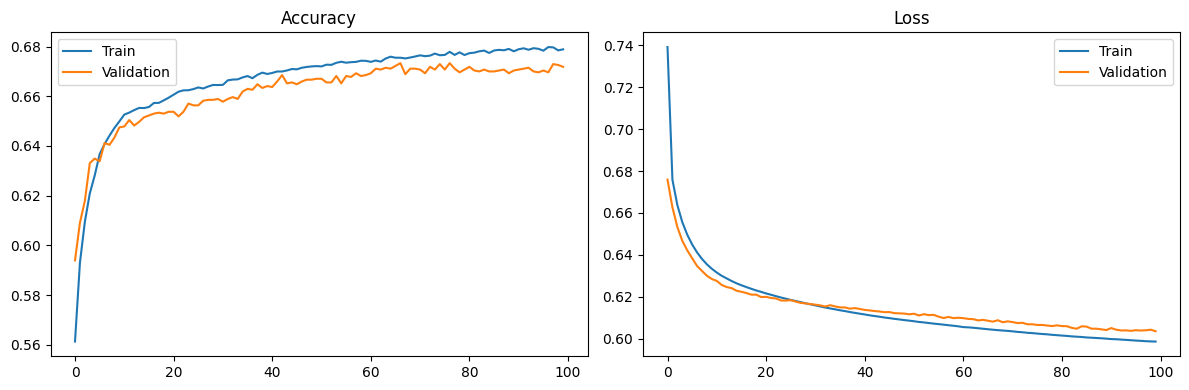

In [75]:
# Vẽ biểu đồ quá trình huấn luyện
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(train_acc, label="Train")
axs[0].plot(val_acc, label="Validation")
axs[0].set_title("Accuracy")
axs[0].legend()

axs[1].plot(train_loss, label="Train")
axs[1].plot(val_loss, label="Validation")
axs[1].set_title("Loss")
axs[1].legend()

plt.tight_layout()
plt.show()

In [76]:
# Đánh giá mô hình
eval = model_hub.evaluate(testing_sentences, testing_labels)
print("Loss: ", eval[0])
print("Accuracy: ", eval[1])

85/85 [==============================] - 0s 1ms/step - loss: 0.6035 - accuracy: 0.6718
Loss:  0.6034964919090271
Accuracy:  0.6718346476554871


Wow 😮✨  

Nói thế nào nhỉ, các đường biểu diễn quá trình huấn luyện đã thực sự **khớp hơn rất nhiều** so với trước đây. Tuy nhiên, lại xuất hiện hiện tượng **độ hiệu quả không cao**, thấp hơn so với các phiên bản mô hình trước. Khi mình tìm hiểu thêm, tác giả cũng đề cập rằng ông đã gặp phải trường hợp tương tự.  

Điều này có thể xuất phát từ việc **mã hóa các vector biểu diễn từ cấp từ thành cấp câu**. Trong trường hợp bộ dữ liệu **Sarcastic**, các từ riêng lẻ có thể mang lại **ảnh hưởng vô cùng lớn** đến khả năng phân loại. Khi sử dụng **bộ nhúng embedding có sẵn**, dù chúng mang lại yếu tố **khái quát hóa** và giảm **tình trạng quá khớp (overfiting)**, nhưng lại **thiếu các từ đặc trưng** quan trọng trong ngữ cảnh của bài toán, dẫn đến hiệu quả mô hình thấp hơn.  

🌟 **Tuy nhiên**, không thể phủ nhận rằng **bộ nhúng embedding có sẵn** thực sự rất hữu ích, chỉ là nó không hoàn toàn phù hợp cho **bài toán và dữ liệu chuyên biệt** của chúng ta thôi.

# Using Pretrained Embedding from Hugging Face 🚀  
### (Sử dụng bộ nhúng có sẵn từ Hugging Face)  

Cái này **không có trong sách** đâu nha, mình tự thêm vào để **mở rộng** và **ôn tập thêm** á. 😄  
Mọi người tham khảo thử nha! 💡

Nếu chạy code bên dưới lỗi, bạn hãy thử hạ batch_size chỗ chuyển dữ liệu thành embedding xuống dưới 32 nha, có thể là 16.

In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from transformers import AutoTokenizer, TFAutoModel

# Tải pretrained embedding từ Hugging Face
model_name = "bert-base-uncased"  # Pretrained model name
tokenizer = AutoTokenizer.from_pretrained(model_name)
pretrained_model = TFAutoModel.from_pretrained(model_name)

# Freeze pretrained embedding để không train lại
pretrained_model.trainable = False

# Hàm để chuyển đổi văn bản thành embedding
def preprocess_and_embed(texts, batch_size=32):
    embeddings = []
    # Chia thành các batch phòng tránh trường hợp tràn ram GPU
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        inputs = tokenizer(batch_texts, padding=True, truncation=True, max_length=512, return_tensors="tf")
        outputs = pretrained_model(**inputs)
        embeddings.append(outputs.last_hidden_state[:, 0, :])
    return tf.concat(embeddings, axis=0)  # Gộp tất cả các batch lại


# Chuyển đổi dữ liệu thành embedding
training_embeddings = preprocess_and_embed(training_sentences, 16)  # Shape: (batch_size, embedding_dim)
testing_embeddings = preprocess_and_embed(testing_sentences, 16)

# Tạo mô hình TensorFlow Sequential với pretrained embedding
model_hf = Sequential([
    Input(shape=(training_embeddings.shape[1],)),  # Kích thước embedding_dim
    Dense(16, activation="relu"),  # Lớp ẩn
    Dense(1, activation="sigmoid")  # Lớp đầu ra (phân loại nhị phân)
])

# Cấu hình bộ tối ưu Adam
adam = Adam(learning_rate=0.0001)

# Compile mô hình
model_hf.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [79]:
training_embeddings = np.array(training_embeddings)
testing_embeddings = np.array(testing_embeddings)
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [80]:
import time
start_time = time.time()
history_hf = model_hf.fit(training_embeddings, training_labels, epochs=100, validation_data=(testing_embeddings, testing_labels))
end_time = time.time()

Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 0.5204 - accuracy: 0.7547 - val_loss: 0.4330 - val_accuracy: 0.8173
Epoch 2/100
750/750 [==============================] - 1s 2ms/step - loss: 0.4121 - accuracy: 0.8235 - val_loss: 0.3814 - val_accuracy: 0.8317
Epoch 3/100
750/750 [==============================] - 1s 2ms/step - loss: 0.3741 - accuracy: 0.8399 - val_loss: 0.3555 - val_accuracy: 0.8505
Epoch 4/100
750/750 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.8474 - val_loss: 0.3389 - val_accuracy: 0.8527
Epoch 5/100
750/750 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.8542 - val_loss: 0.3307 - val_accuracy: 0.8583
Epoch 6/100
750/750 [==============================] - 1s 2ms/step - loss: 0.3287 - accuracy: 0.8589 - val_loss: 0.3202 - val_accuracy: 0.8642
Epoch 7/100
750/750 [==============================] - 1s 2ms/step - loss: 0.3206 - accuracy: 0.8616 - val_loss: 0.3172 - val_accuracy: 0.8660

In [81]:
from datetime import timedelta
print("Thời gian huấn luyện: ", timedelta(seconds=end_time-start_time))

Thời gian huấn luyện:  0:02:22.598753


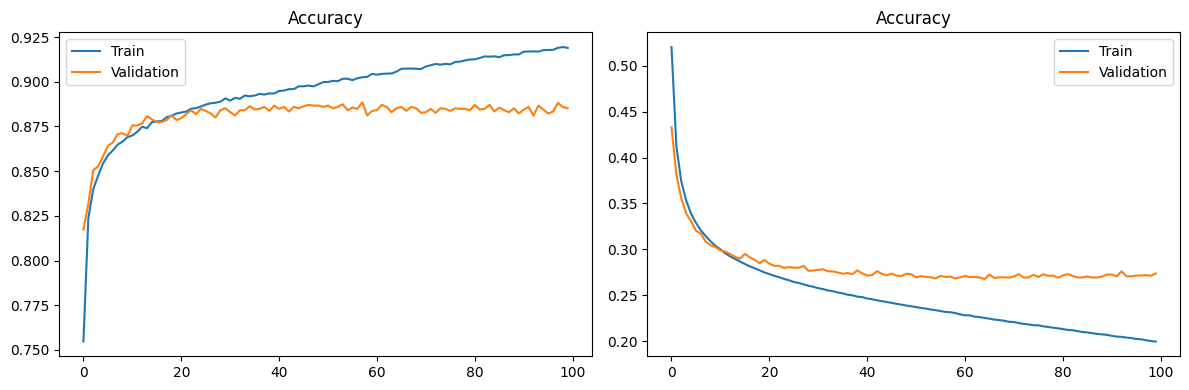

In [82]:
import matplotlib.pyplot as plt

# Vẽ quá trình huấn luyện
train_acc = history_hf.history["accuracy"]
val_acc = history_hf.history["val_accuracy"]
train_loss = history_hf.history["loss"]
val_loss = history_hf.history["val_loss"]

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs = axs.flatten()
axs[0].plot(train_acc, label="Train")
axs[0].plot(val_acc, label="Validation")
axs[0].set_title("Accuracy")
axs[0].legend()

axs[1].plot(train_loss, label="Train")
axs[1].plot(val_loss, label="Validation")
axs[1].set_title("Accuracy")
axs[1].legend()

plt.tight_layout()
plt.show()

In [83]:
# Đánh giá mô hình
eval = model_hf.evaluate(testing_embeddings, testing_labels)
print("Loss: ", eval[0])
print("Accuracy: ", eval[1])

85/85 [==============================] - 0s 1ms/step - loss: 0.2736 - accuracy: 0.8852
Loss:  0.2735731899738312
Accuracy:  0.8851974606513977


Uầy, cái **bộ embedding** mình lấy của **BERT** cho ra kết quả bất ngờ luôn nha, đột phá hẳn lên **88% độ chính xác** và **loss** chỉ ở khoảng **0.26**. 🎉✨  

Mọi người có thể linh hoạt thử thêm nhiều cái khác nha, tuy nhiên nhớ lưu ý điều chỉnh **batch** cho phù hợp để hạn chế tình trạng tràn RAM GPU. 🚀  

### **Cách chia batch:**  
1. **Chuyển bộ dữ liệu huấn luyện sang tensor:**  
   Sử dụng `tf.convert_to_tensor()` hoặc các phương pháp tương tự.  

2. **Tạo Dataset từ tf.data.Dataset:**  
   Từ tensor trên, tạo dataset bằng `tf.data.Dataset.from_tensor_slices()`.  

3. **Chia batch bằng dataset.batch:**  
   Sử dụng `dataset.batch(batch_size)` để chia dữ liệu thành các lô (batch).  

4. **Xáo trộn nếu cần bằng dataset.shuffle:**  
   Đảm bảo dữ liệu huấn luyện ngẫu nhiên hơn với `dataset.shuffle(buffer_size)` (tùy chỉnh `buffer_size` cho phù hợp).  

5. **(Optimal) Tối ưu hóa luồng dữ liệu trước khi vào GPU bằng .prefetch:**  
   Thêm `.prefetch(buffer_size=tf.data.AUTOTUNE)` để chuẩn bị trước dữ liệu, giảm thời gian chờ giữa các batch khi xử lý GPU.  

💡 **Tip:** Điều chỉnh `batch_size` để phù hợp với **RAM của GPU** hoặc tài nguyên đang sử dụng.

Học thêm cách chia batch

# Tổng kết lại toàn bộ bài học chương 6 🌟  

Qua chương này, mọi người đã có thể nắm vững những kiến thức sau:  

- **Thế nào là Embedding:** Hiểu được khái niệm và cách Embedding giúp biểu diễn dữ liệu văn bản trong không gian nhiều chiều.  
- **Cách sử dụng Embedding để xử lý dữ liệu huấn luyện:** Ứng dụng lớp **Embedding** trong TensorFlow để tạo ra vector biểu diễn cho các từ trong văn bản.  
- **Các phương pháp để làm giảm tình trạng quá khớp (overfiting) với các mô hình ngôn ngữ:** Từ việc điều chỉnh **learning rate**, giảm **vocab size**, tinh chỉnh **embedding dimensions** đến việc sử dụng **regularization**.  
- **Sử dụng các bộ Embedding có sẵn để kết hợp vào mô hình:** Tận dụng các bộ nhúng đã được huấn luyện sẵn như của **TensorFlow Hub** và **Hugging Face**, bao gồm cả **BERT**, để tăng cường hiệu quả mô hình.  

📌 **Quá trình tiếp cận và xử lý từ ngữ** đóng vai trò vô cùng quan trọng trong việc xác định ngữ nghĩa thực sự của văn bản. Đây chính là mấu chốt giúp bạn cải tiến hiệu quả mô hình, như cách mà chúng ta đã **sử dụng bộ embedding từ BERT** để đạt được kết quả đáng kinh ngạc.  

---

💡 **Chương tiếp theo**, tụi mình sẽ tìm hiểu về **recurrent layer** – tạm dịch là **lớp hồi quy**. 🚀